# Data Validation

We're going to plot some line plots for all of the ground station, satellite combinations we have data for and see if some of them need to be removed from the dataset (i.e. those where no pertubation in the TEC variation is visible). 

## Imports 

In [32]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import pathlib
import seaborn as sns

## Read Data

In [7]:
pth = pathlib.Path("../data/image_based/hawaii/")

# get all the directories in the path 
tracks = os.listdir(pth)
len(tracks)

279

['joka', 'G20']


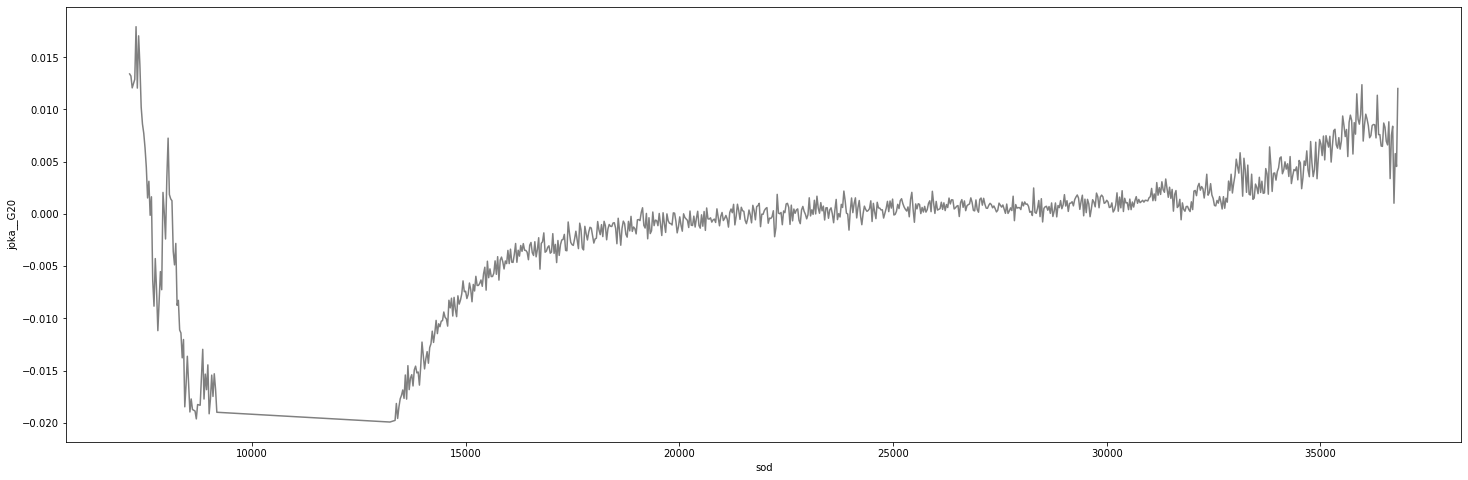

['jcuz', 'G08']


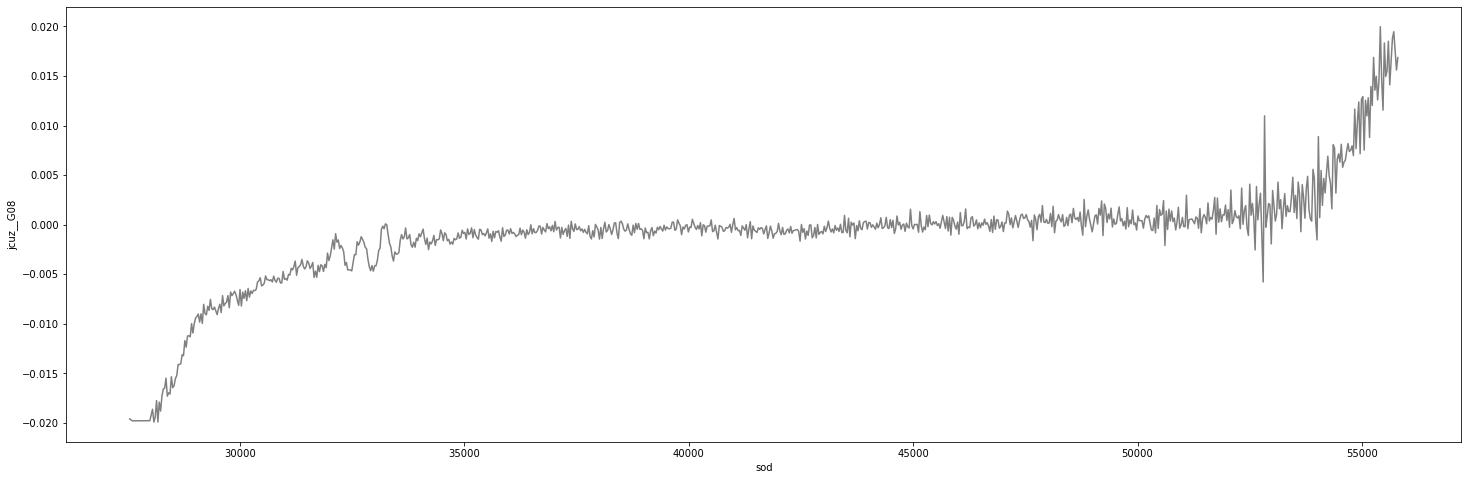

['mlsp', 'G08']


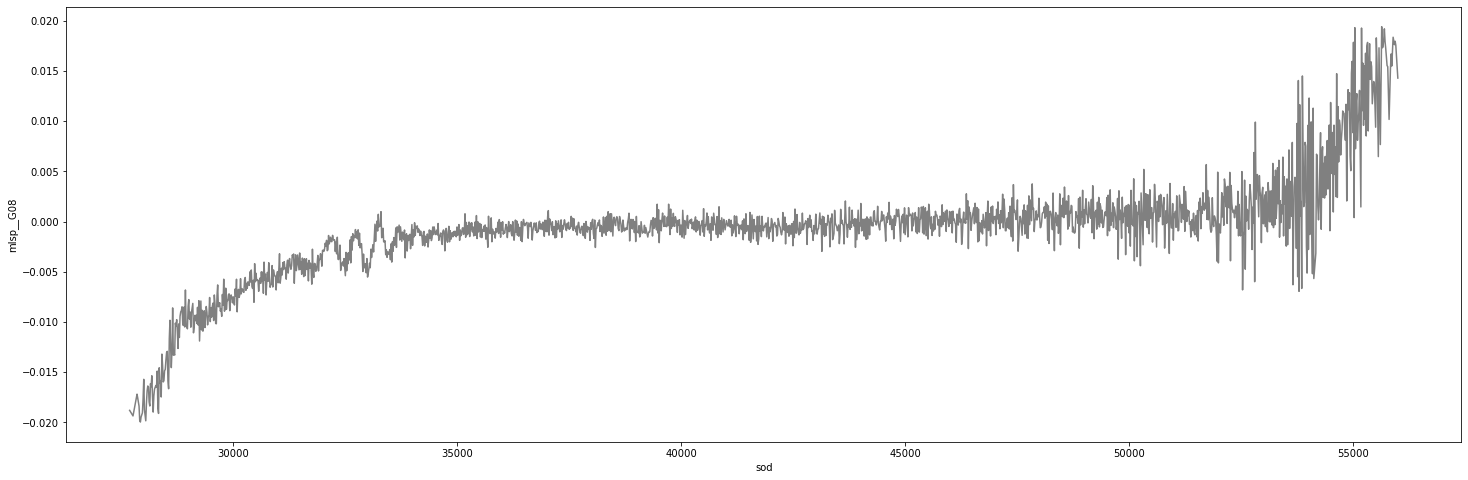

['mles', 'G07']


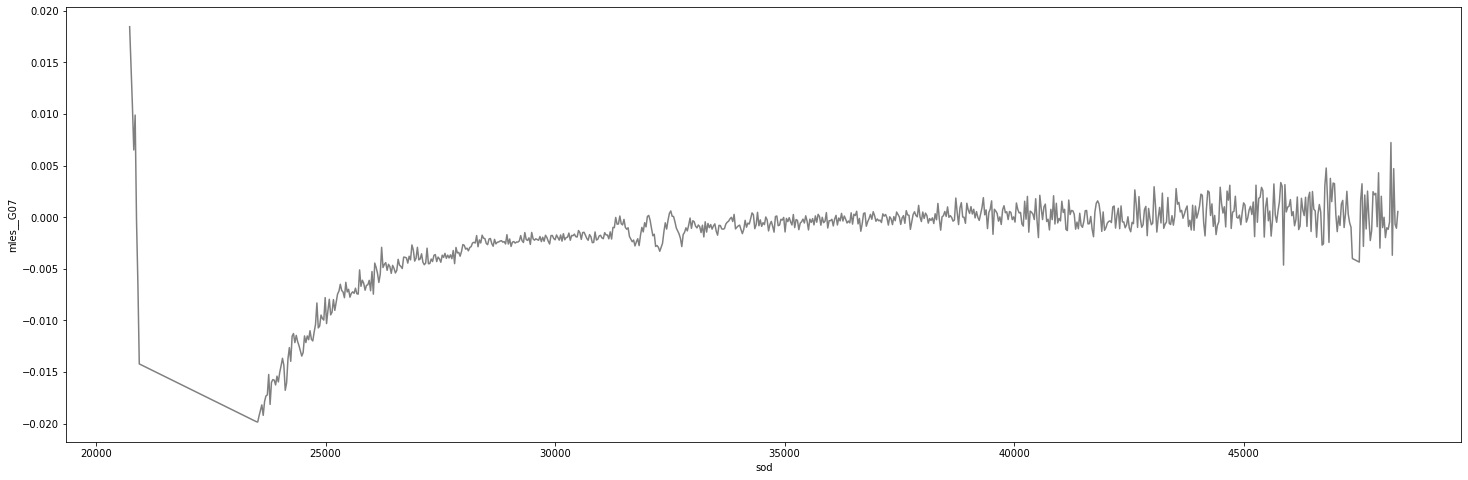

['waor', 'G20']


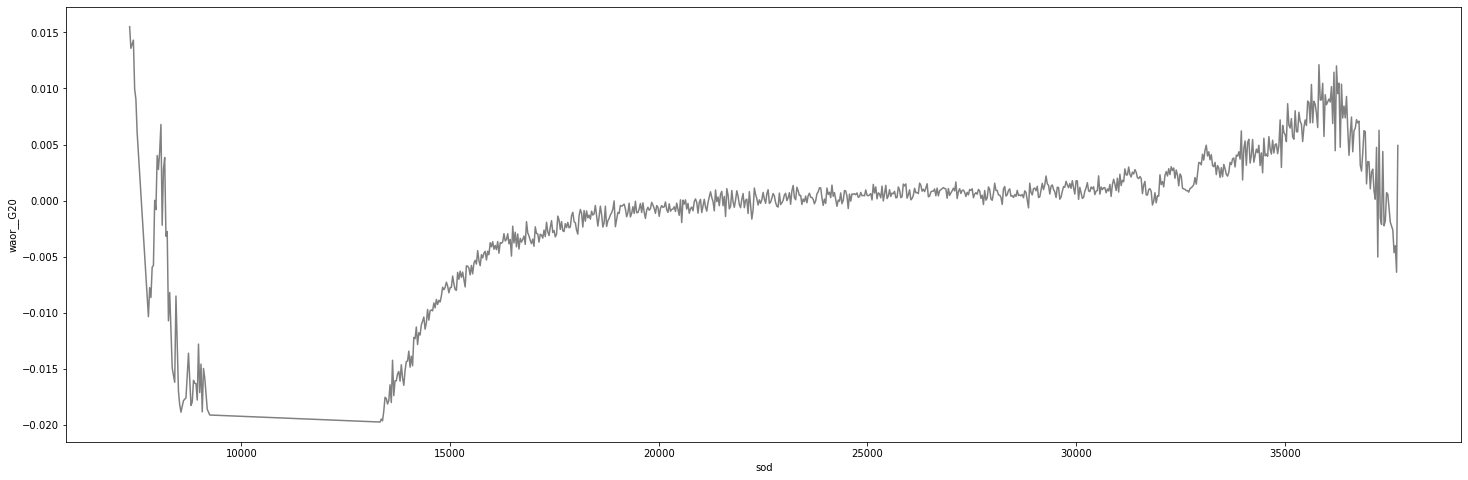

['okit', 'G07']


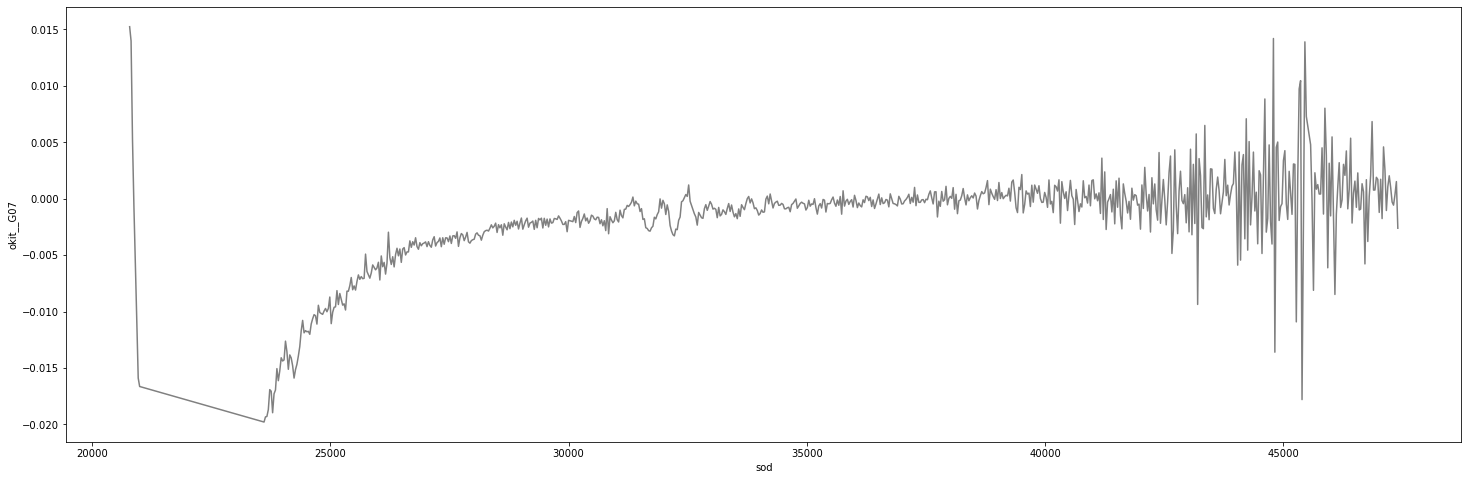

['mlsp', 'G10']


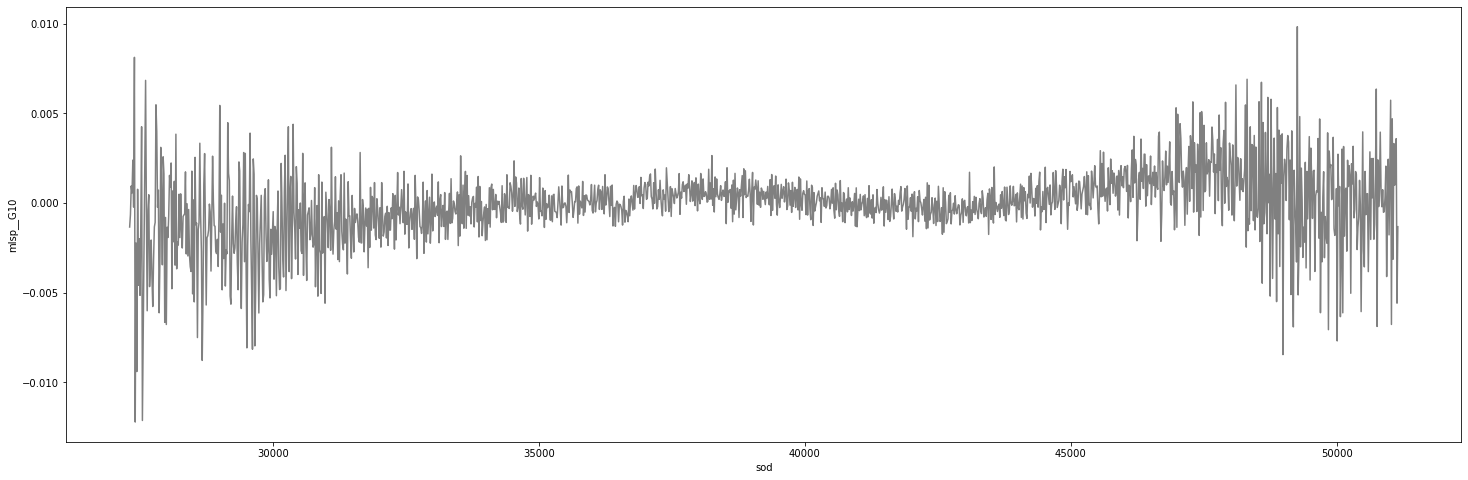

['mane', 'G04']


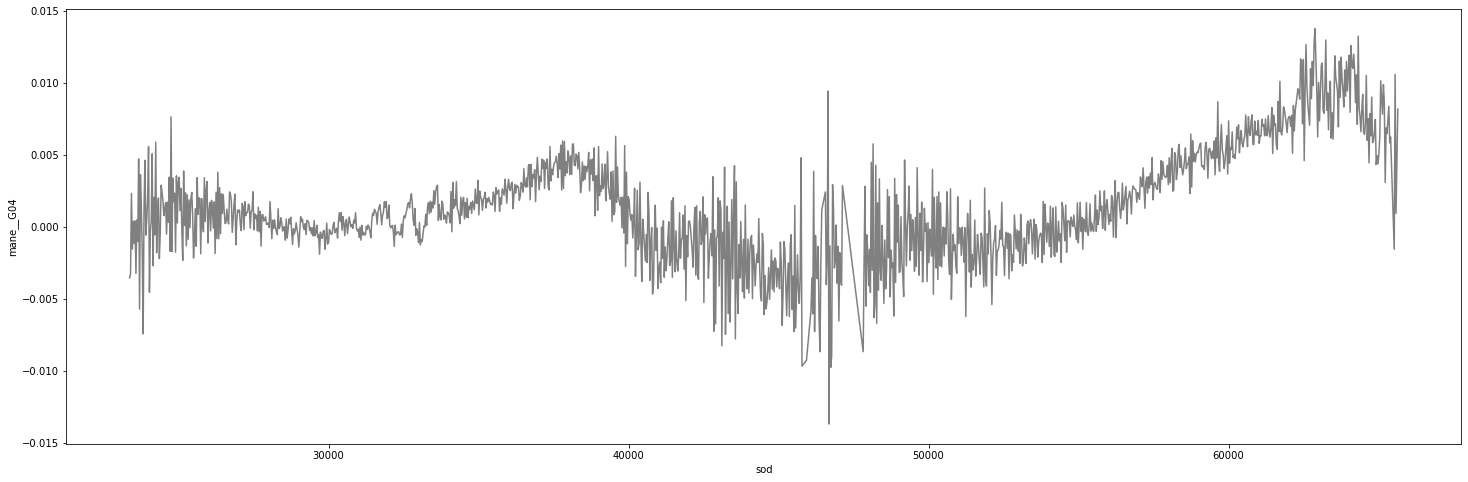

['radf', 'G10']


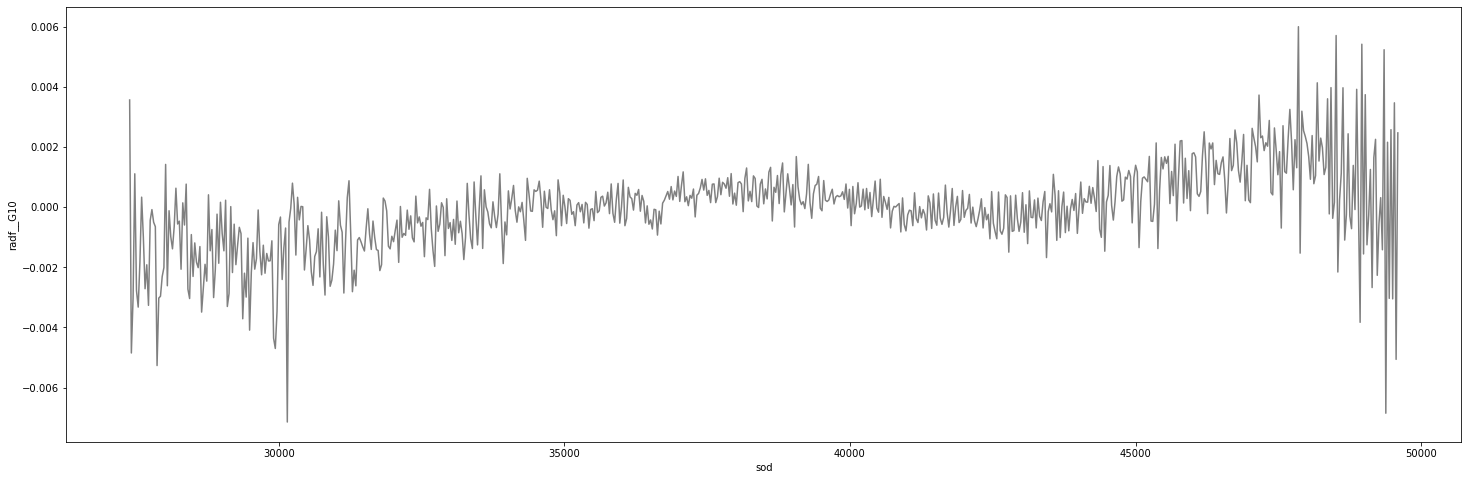

['puka', 'G04']


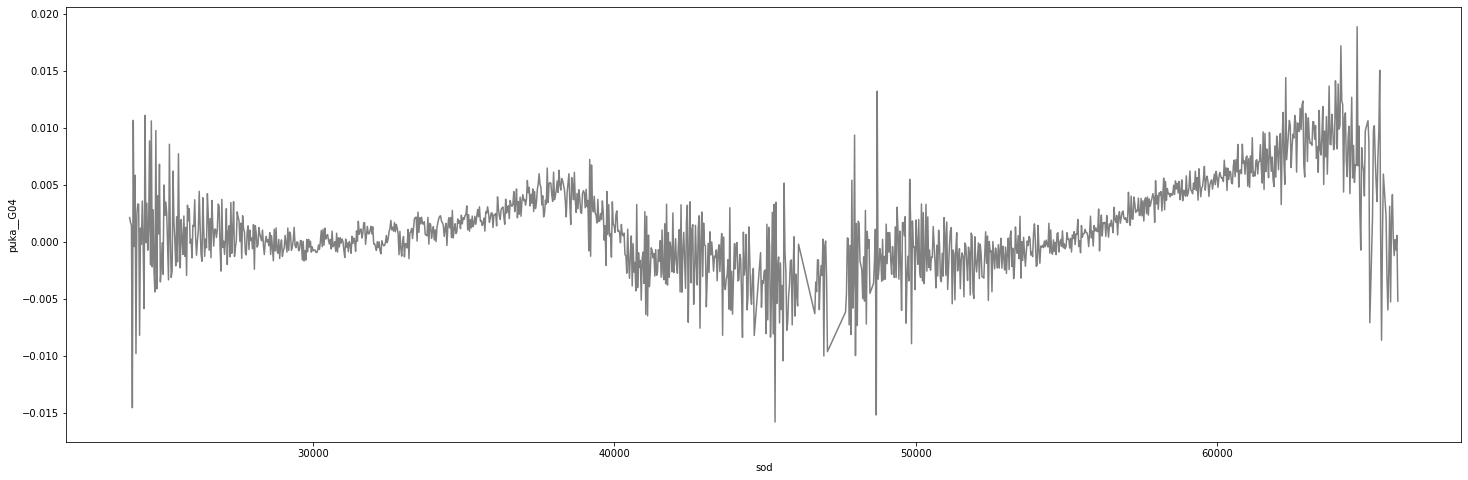

['mkea', 'G10']


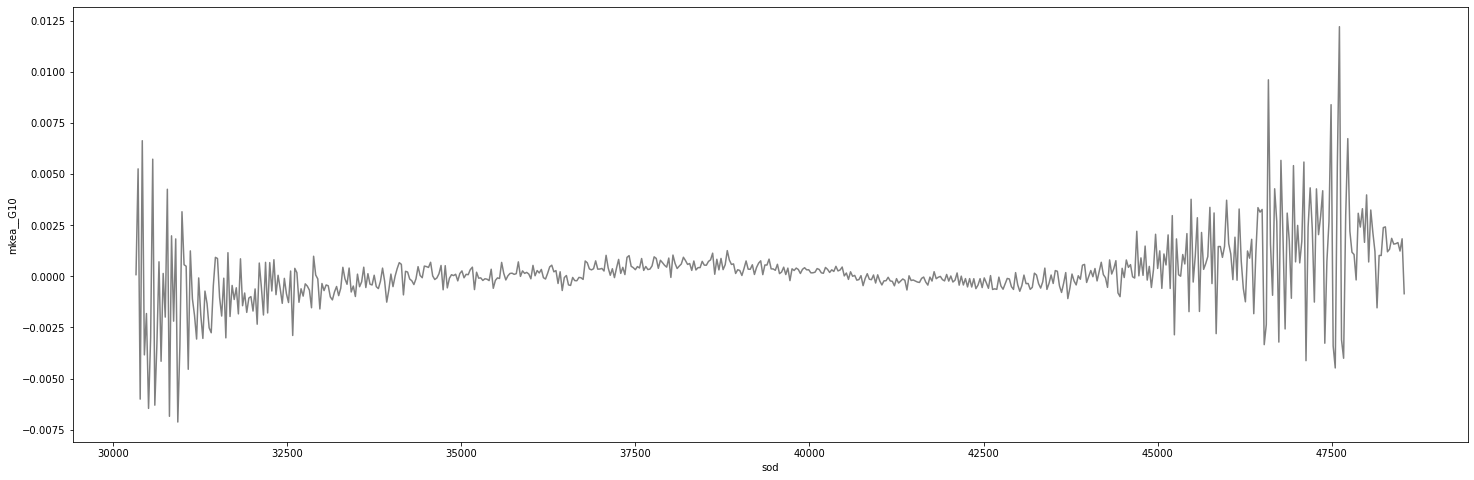

['alal', 'G07']


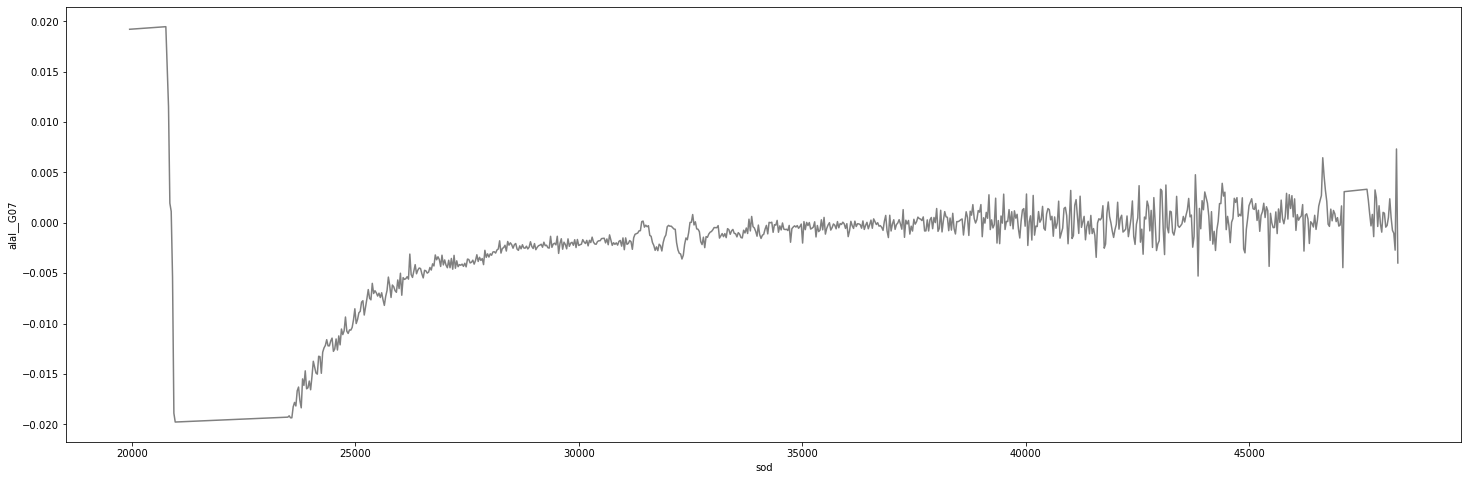

['hole', 'G08']


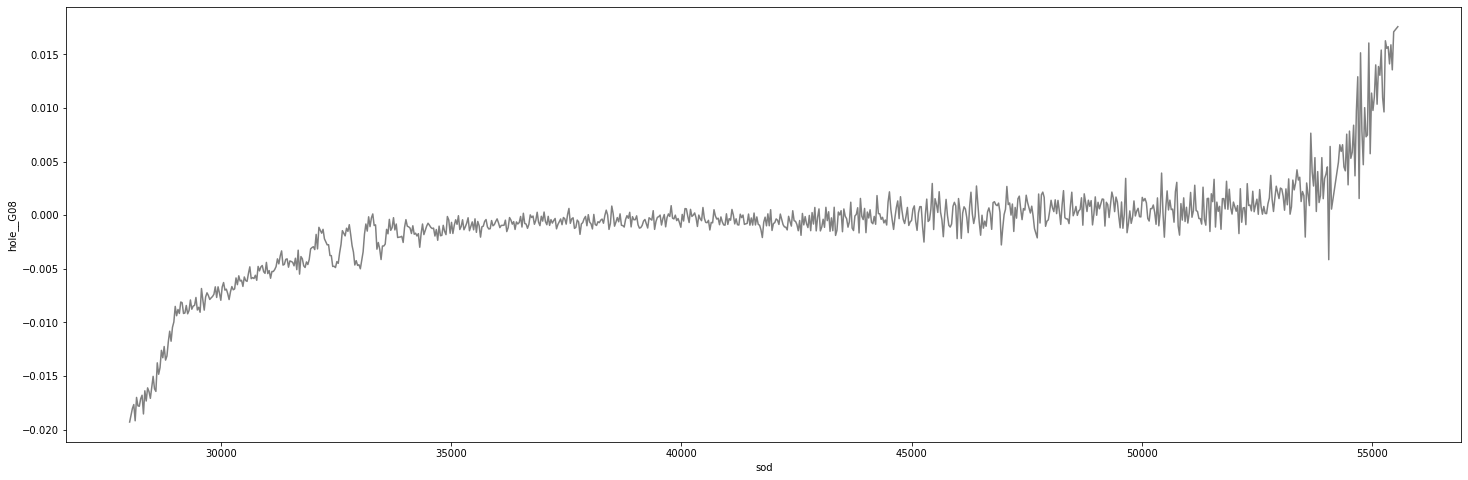

['pat2', 'G07']


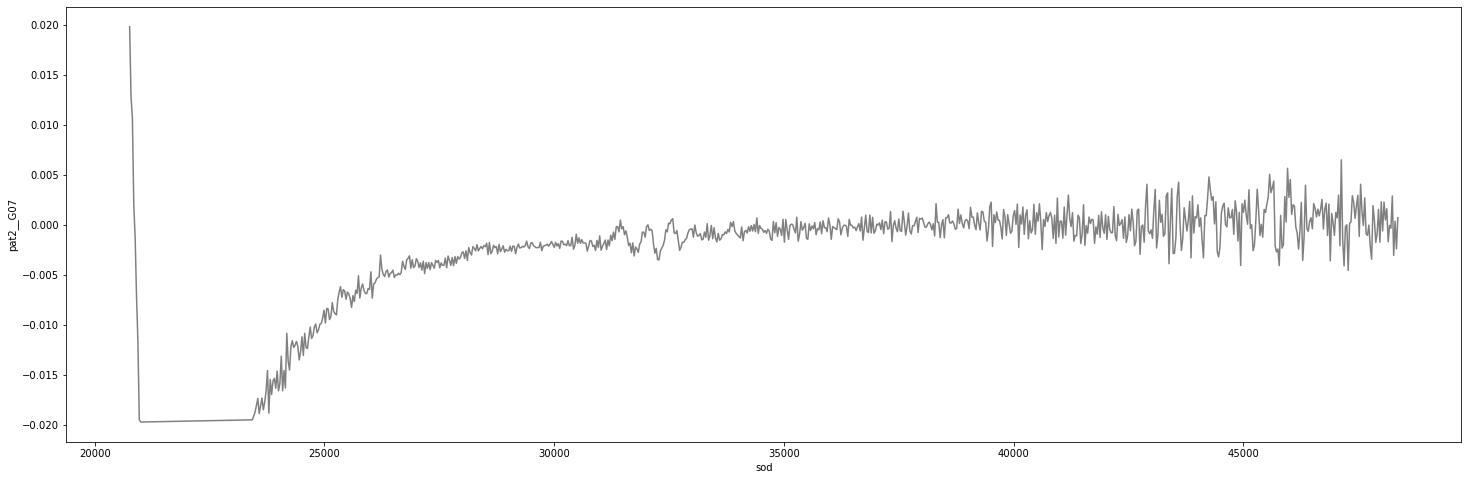

['alep', 'G20']


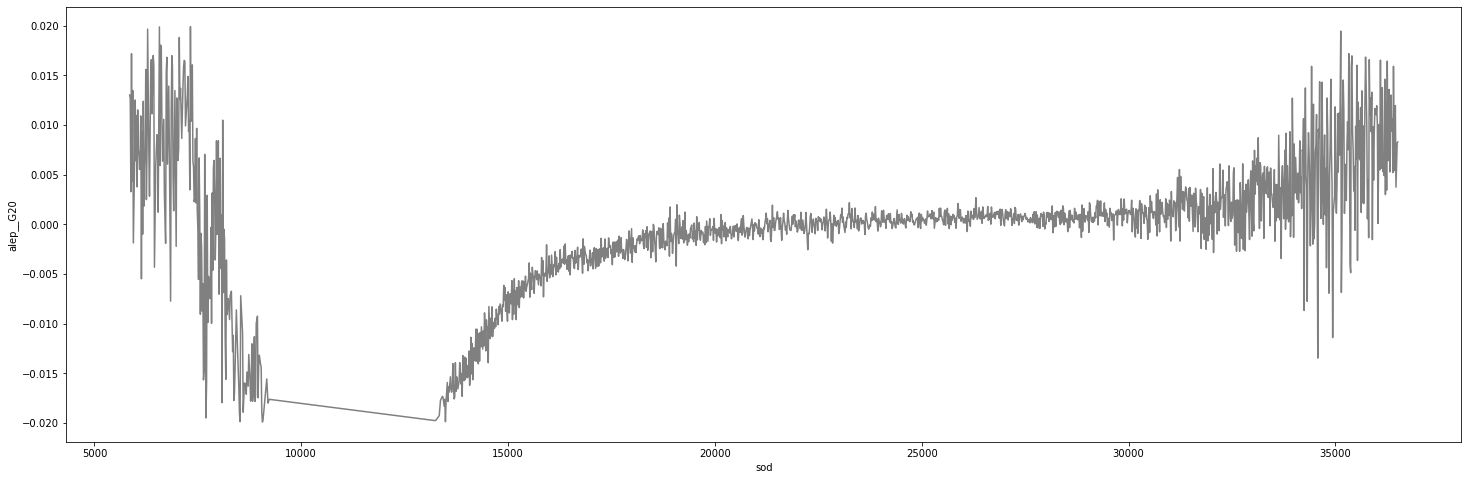

['puka', 'G10']


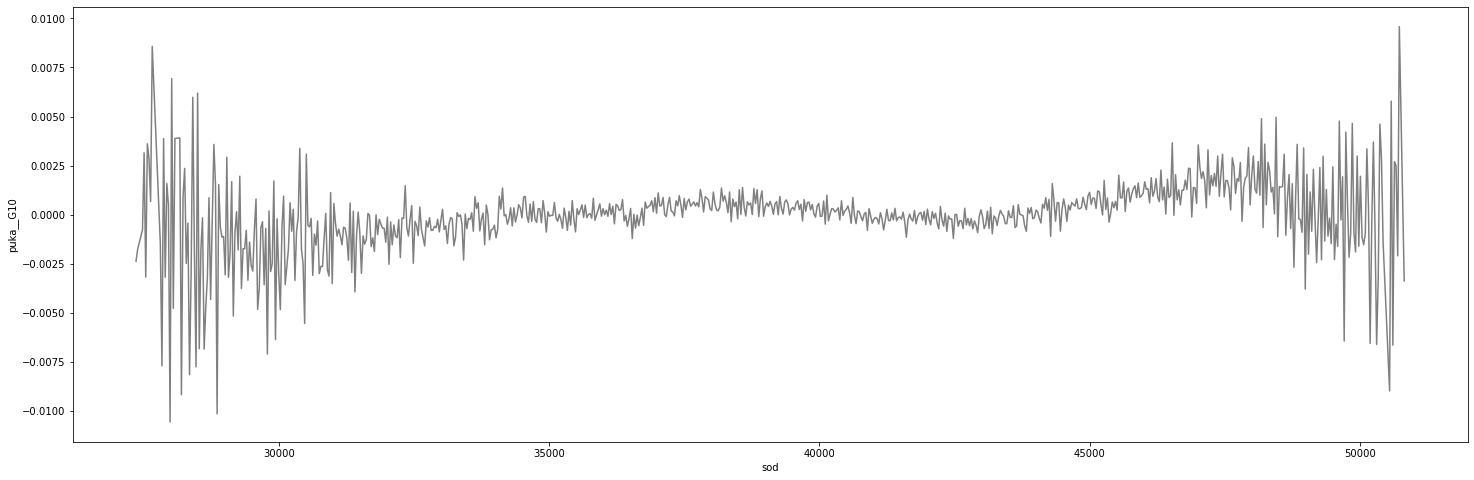

['phan', 'G20']


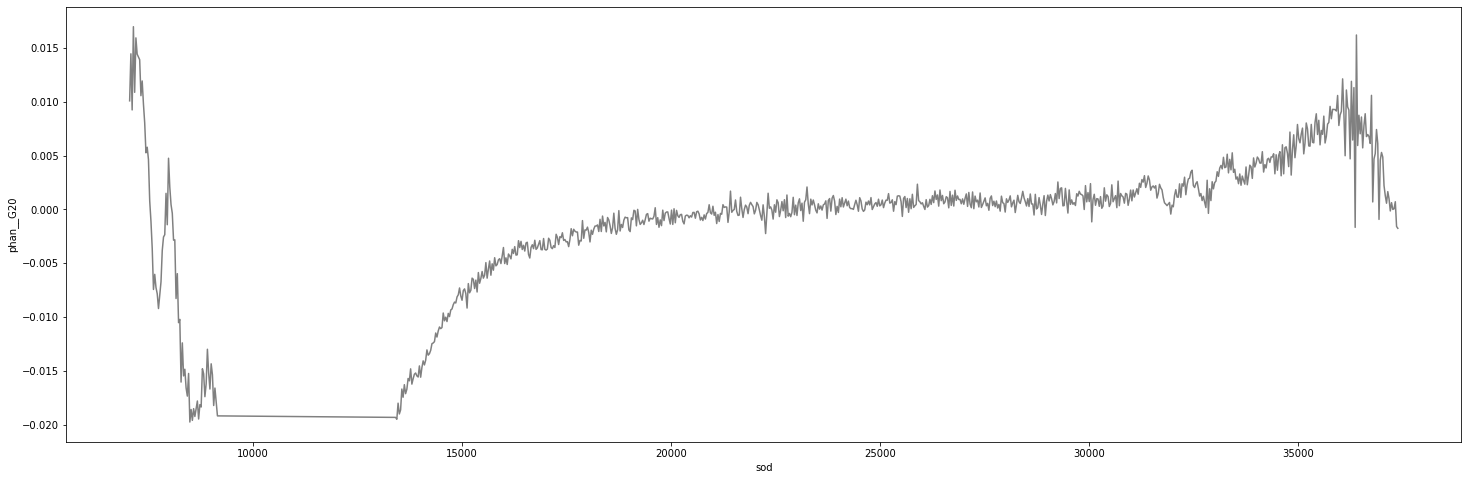

['hnlc', 'G04']
File not found for: hnlc__G04
['radf', 'G04']


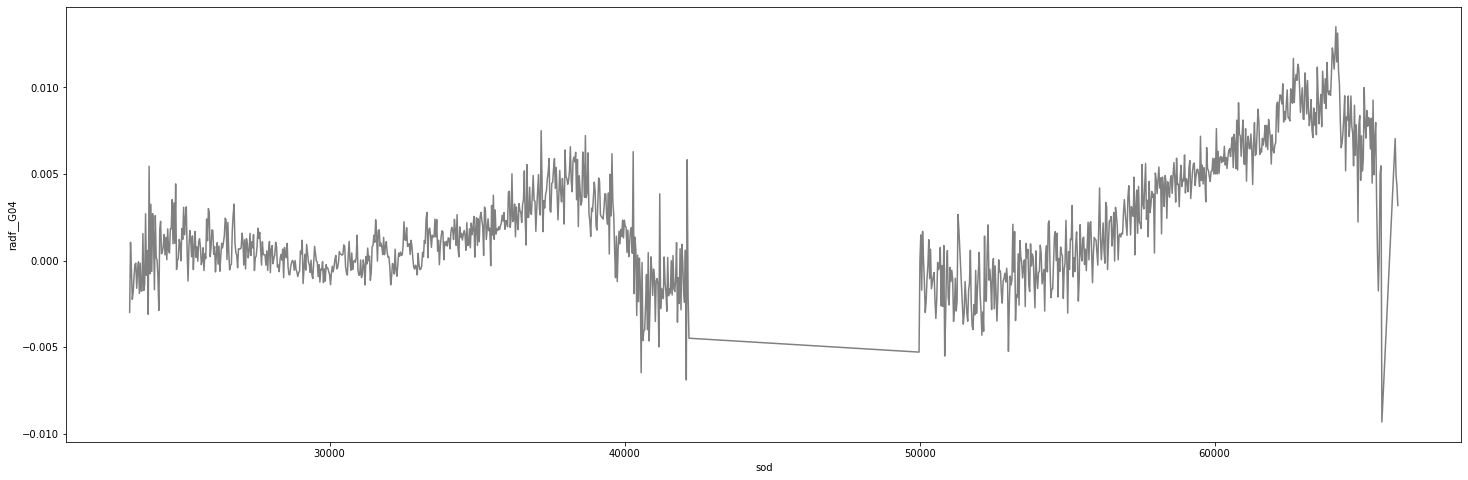

['slpc', 'G07']


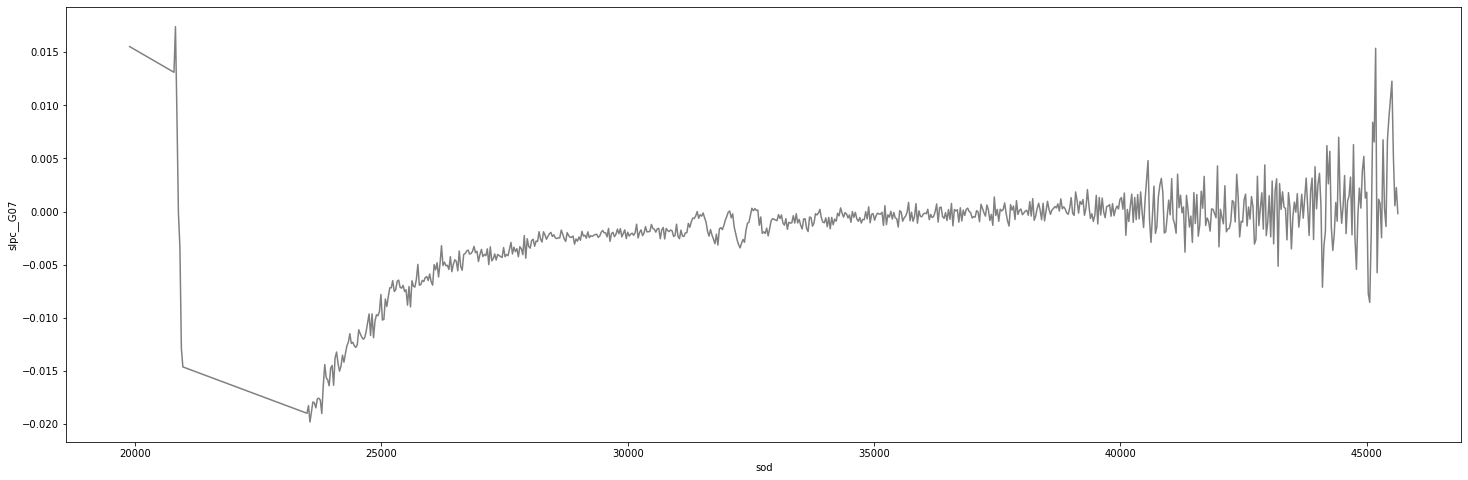

['ahup', 'G10']


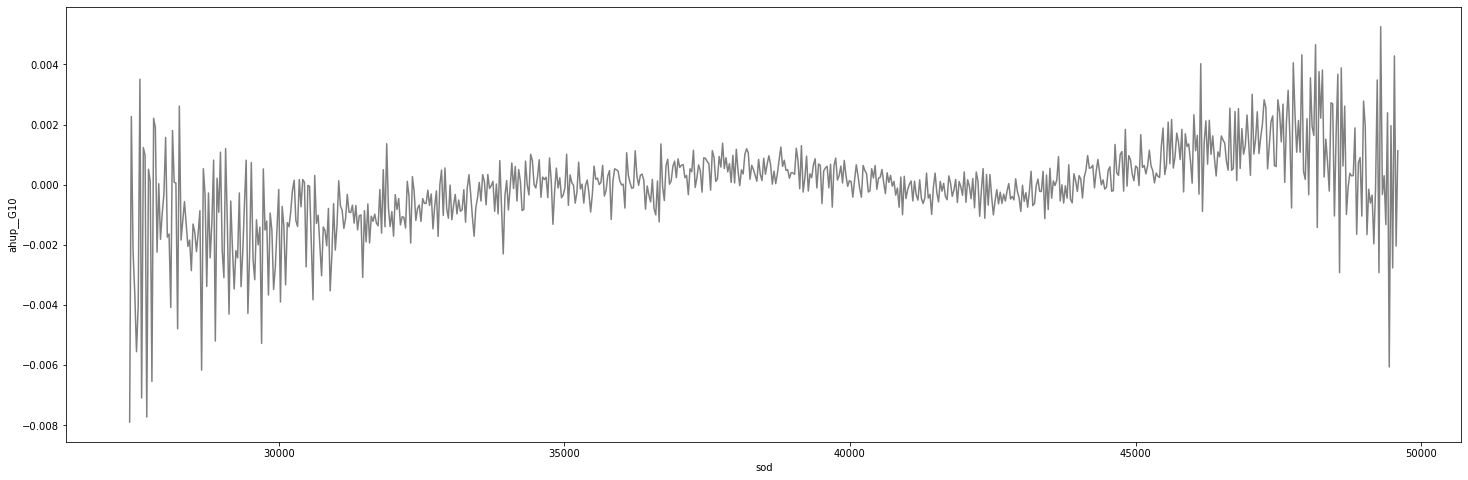

['npit', 'G07']


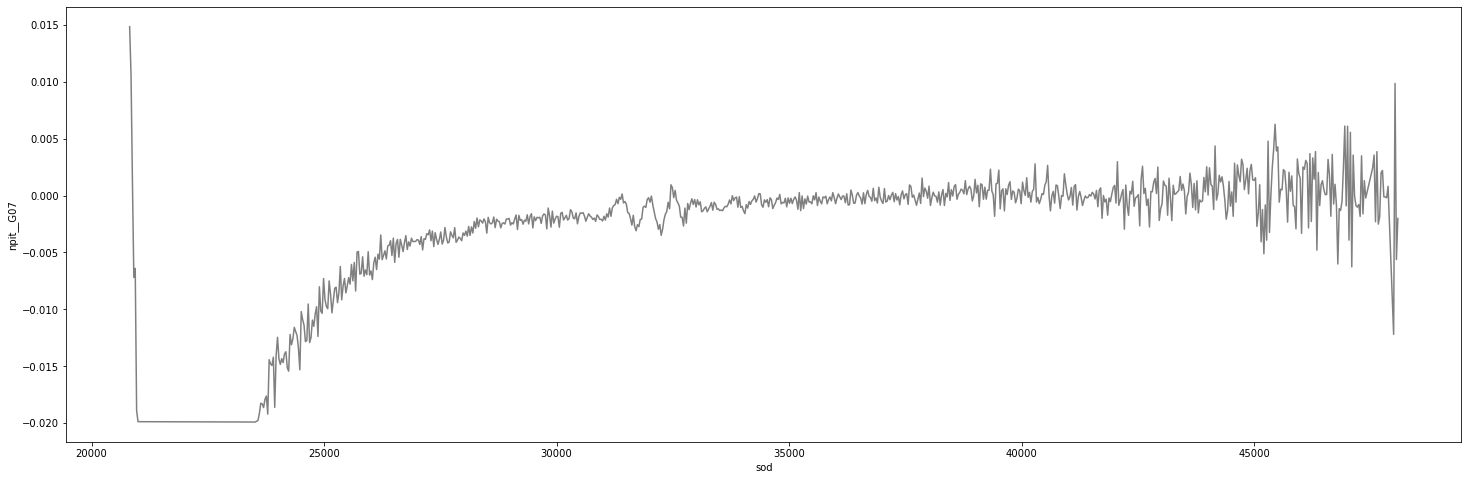

['khku', 'G08']


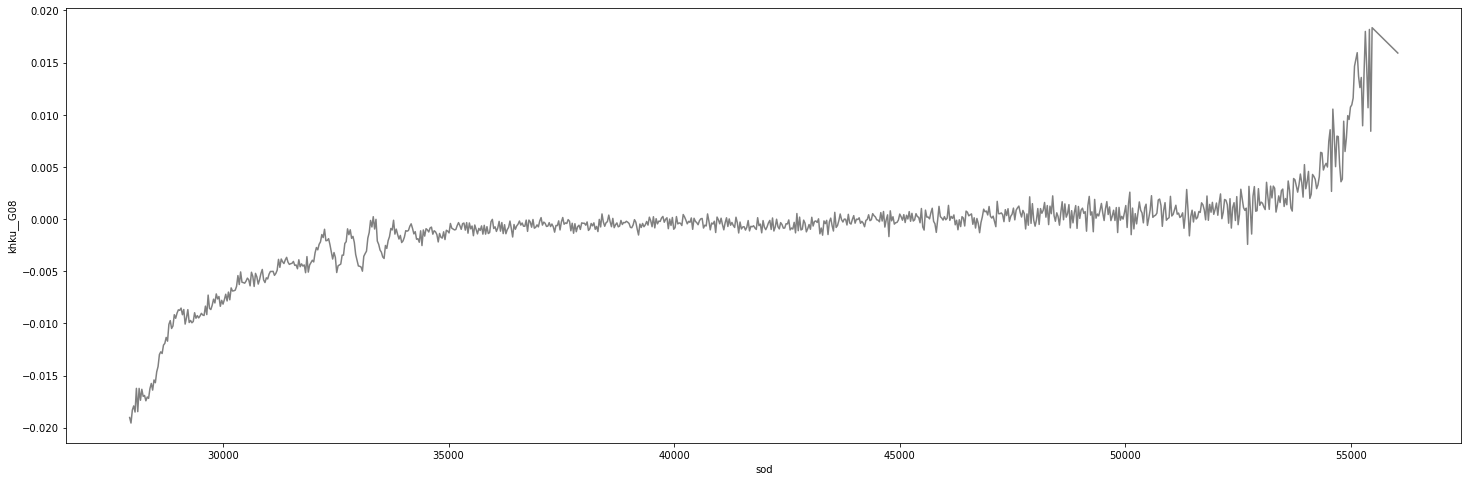

['kfap', 'G04']


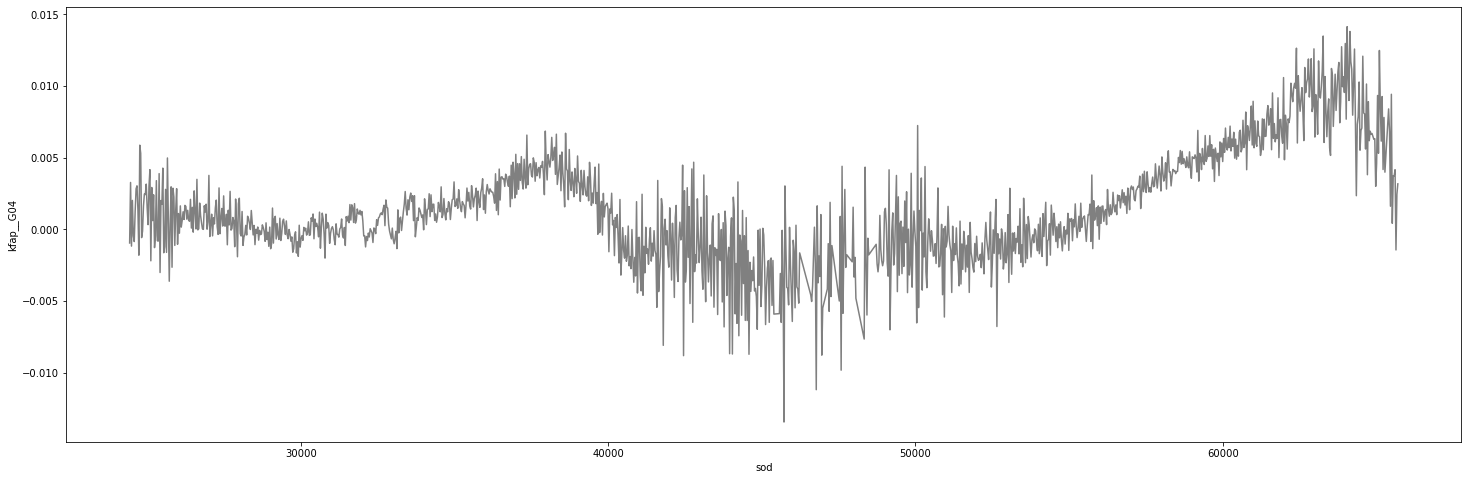

['knne', 'G10']


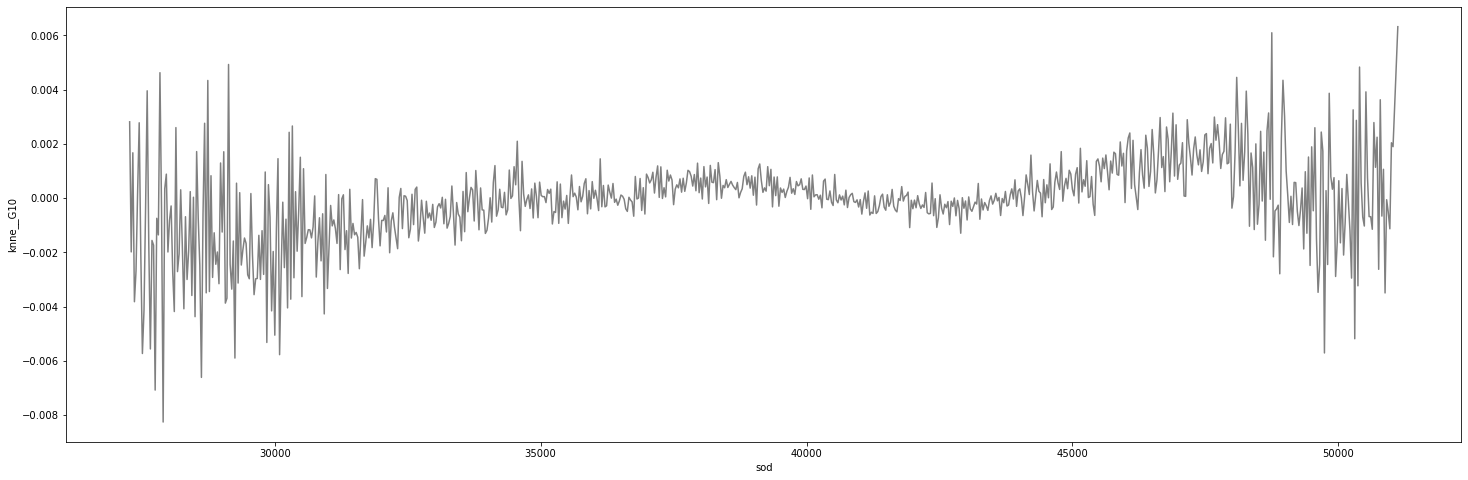

['piik', 'G10']


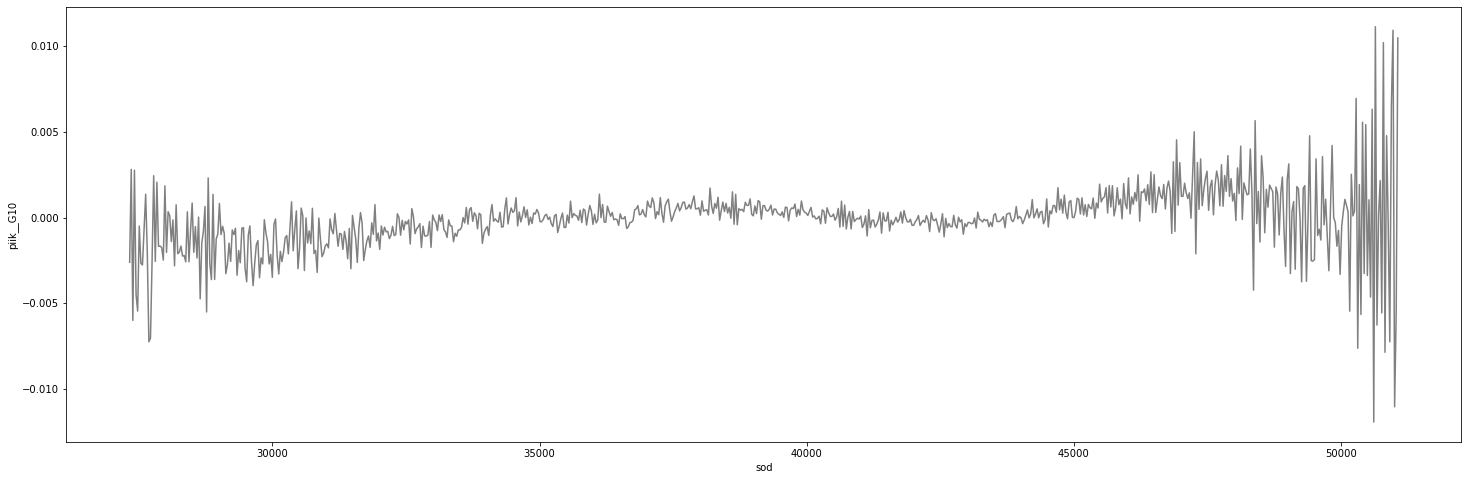

['ktpm', 'G10']


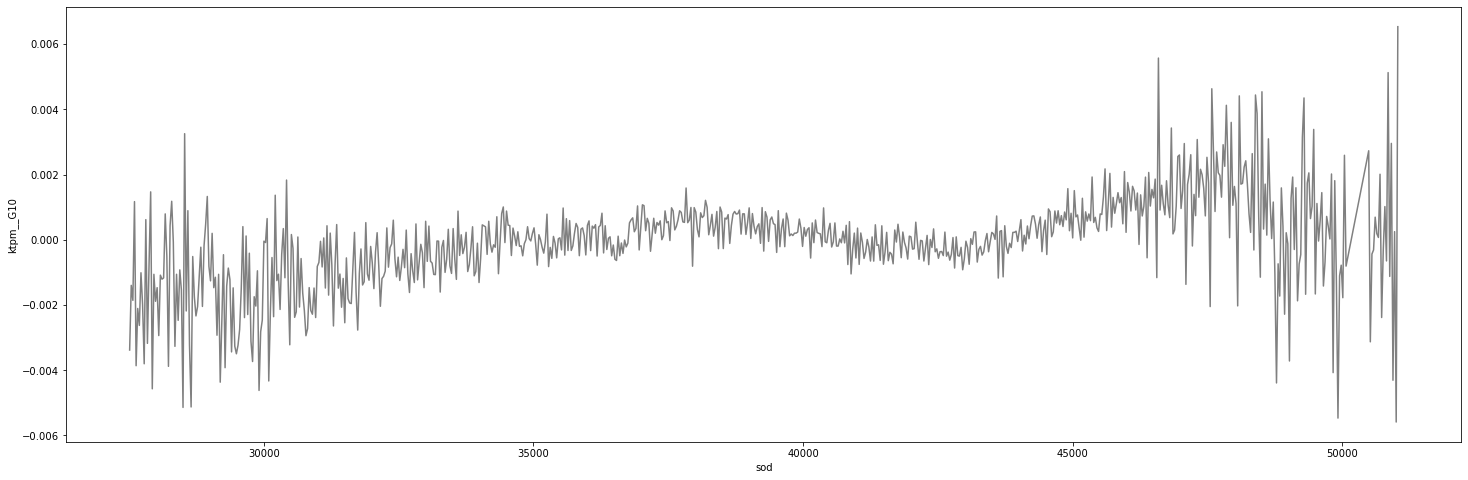

['pgf5', 'G04']


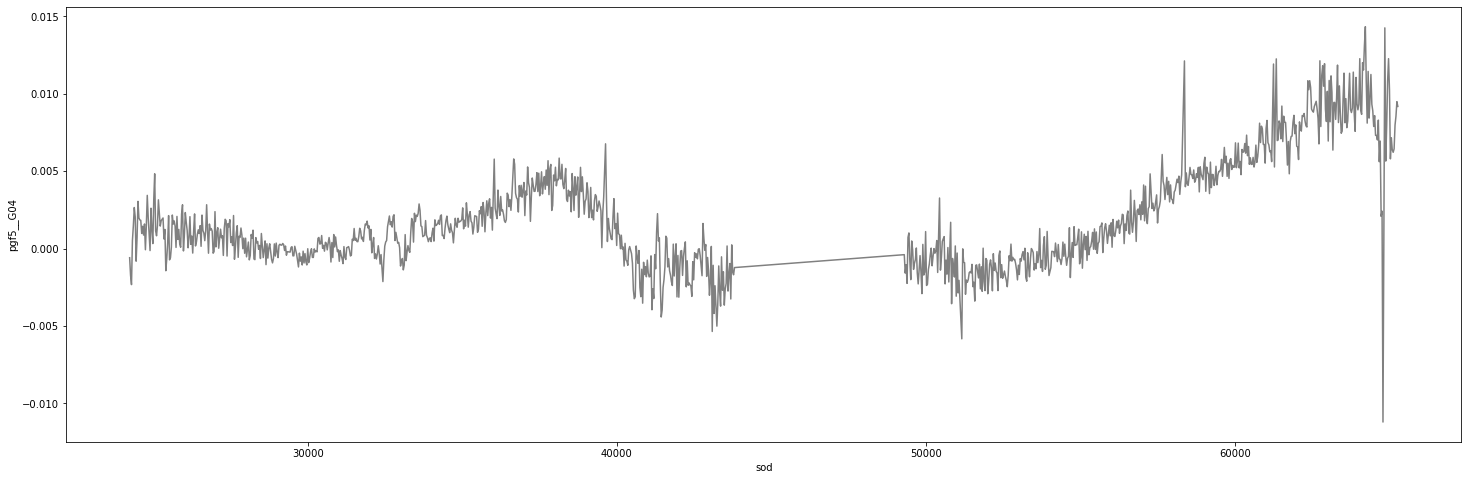

['cnpk', 'G08']


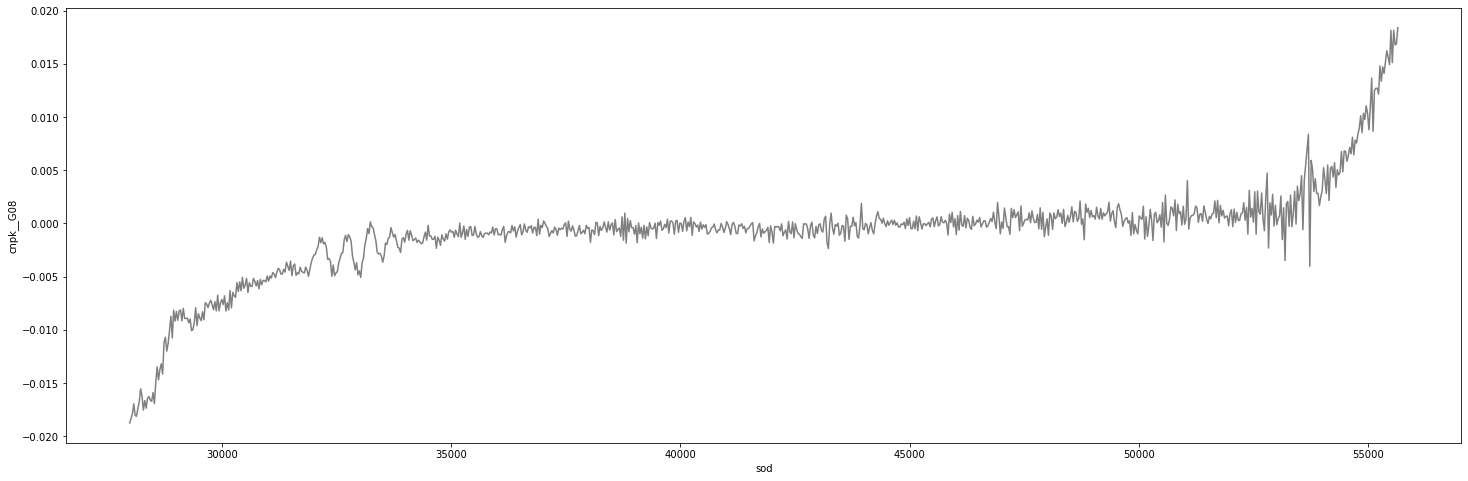

['alal', 'G04']


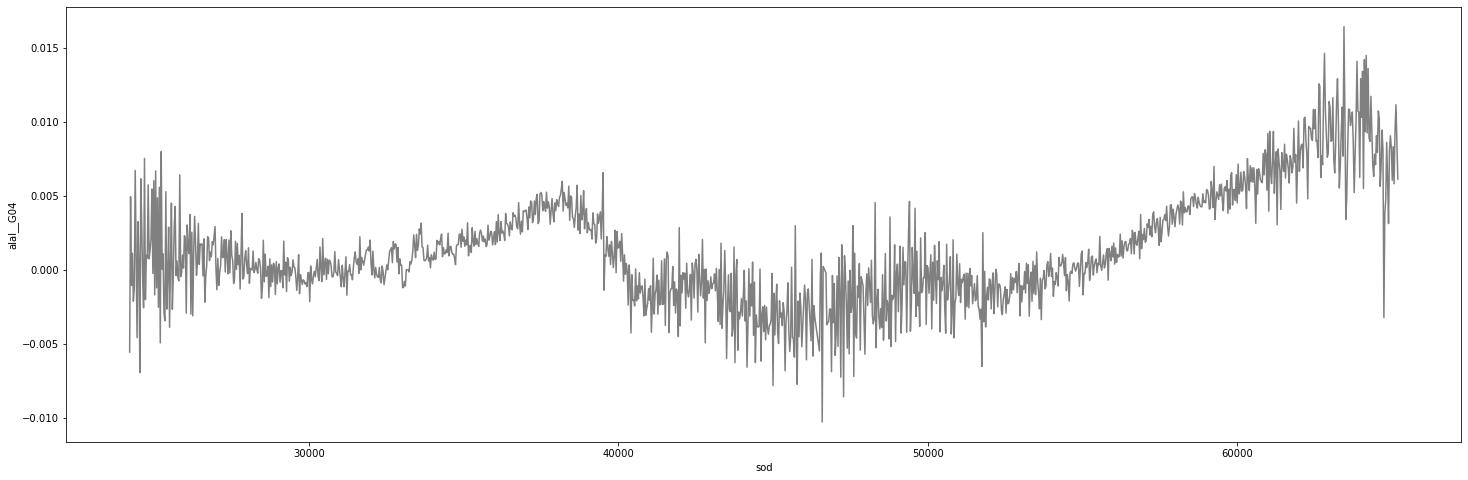

['kaep', 'G04']


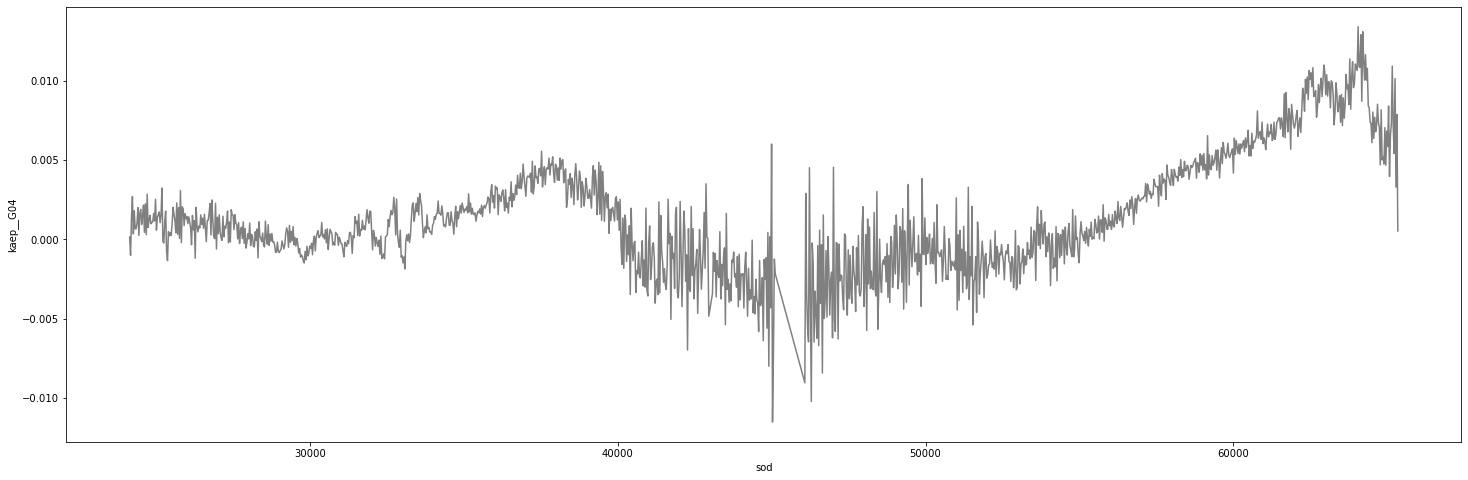

['ahup', 'G04']


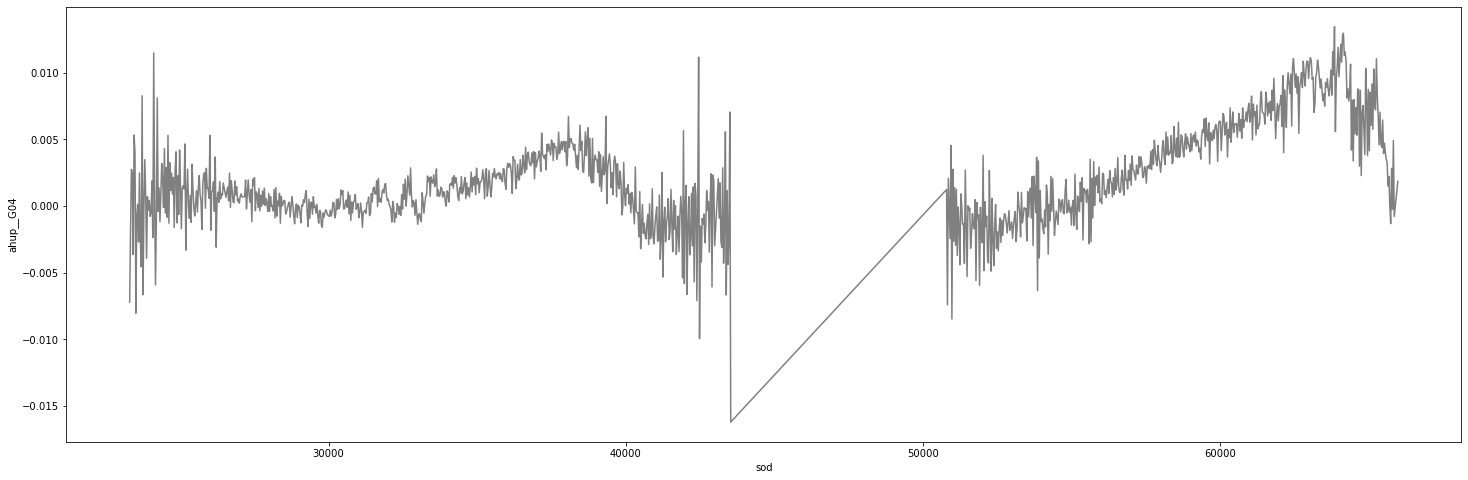

['pgf6', 'G20']


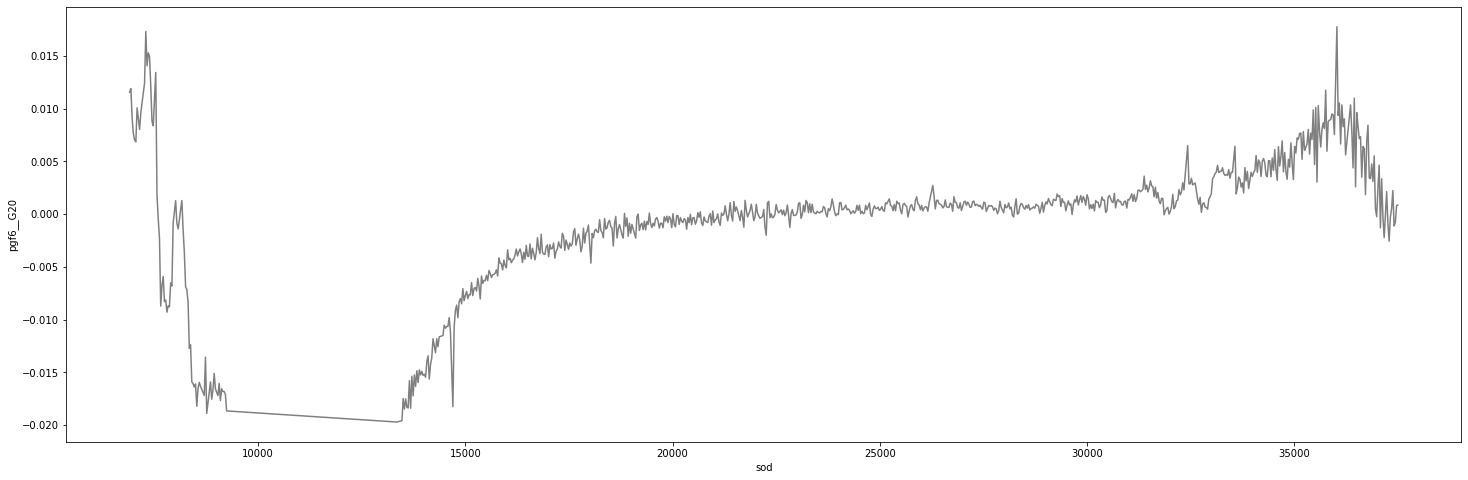

['mlsp', 'G07']


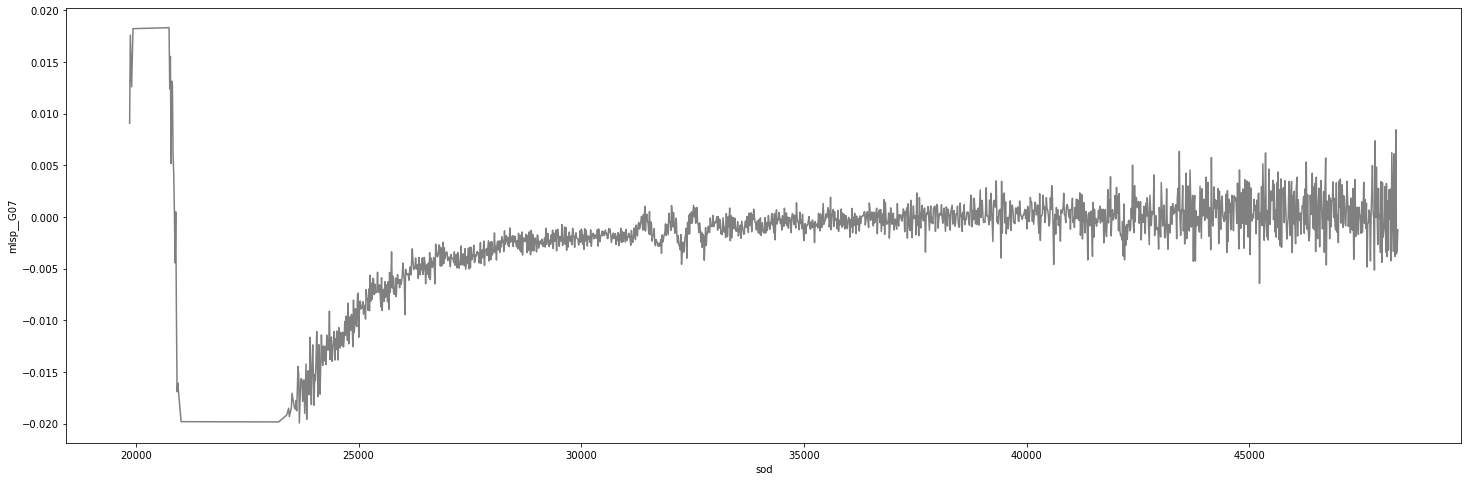

['byrl', 'G04']


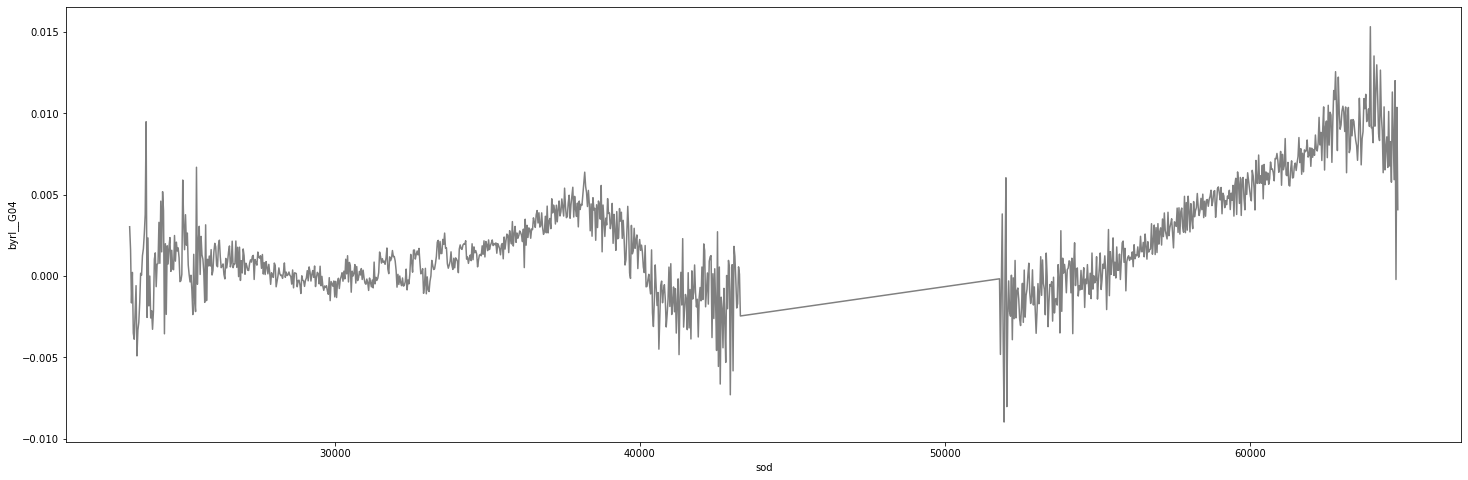

['joka', 'G10']


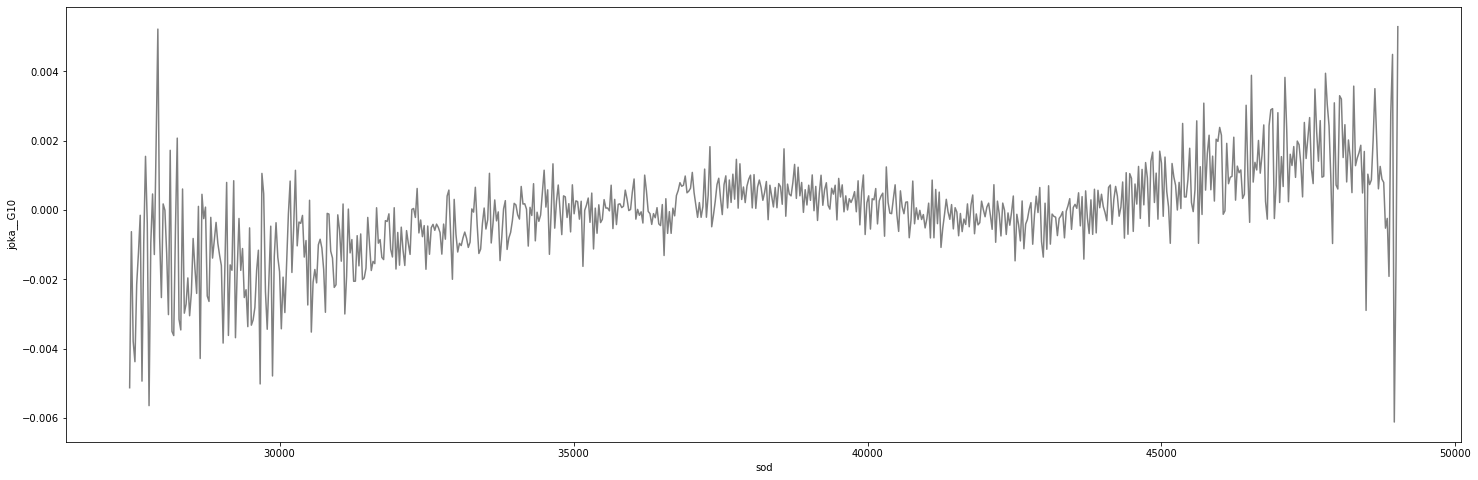

['joka', 'G04']


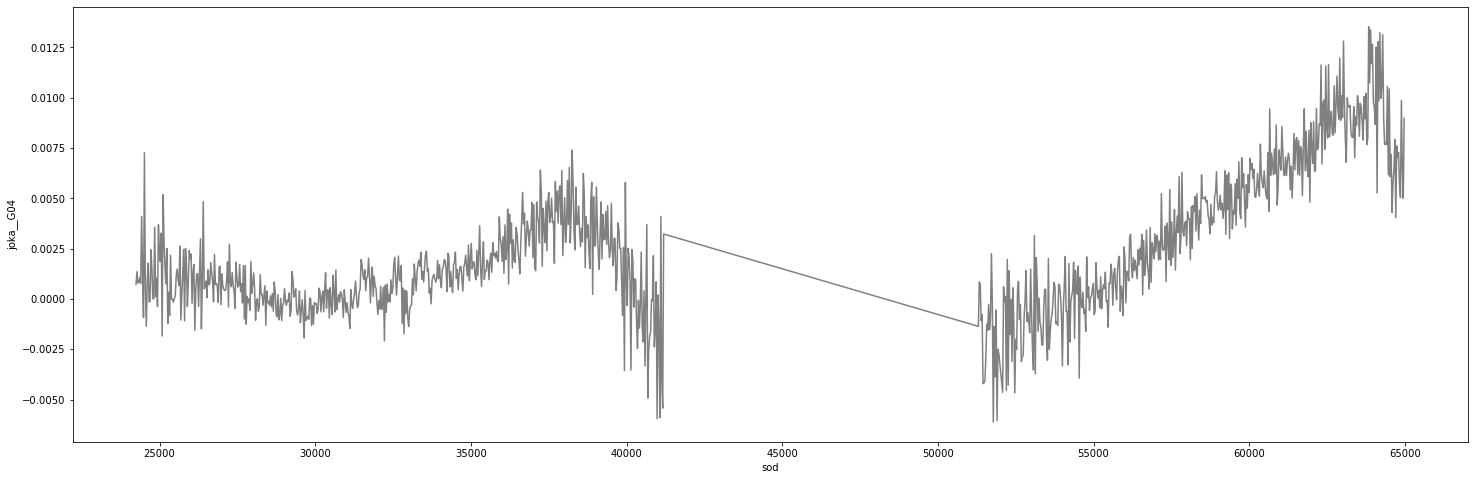

['mmau', 'G07']


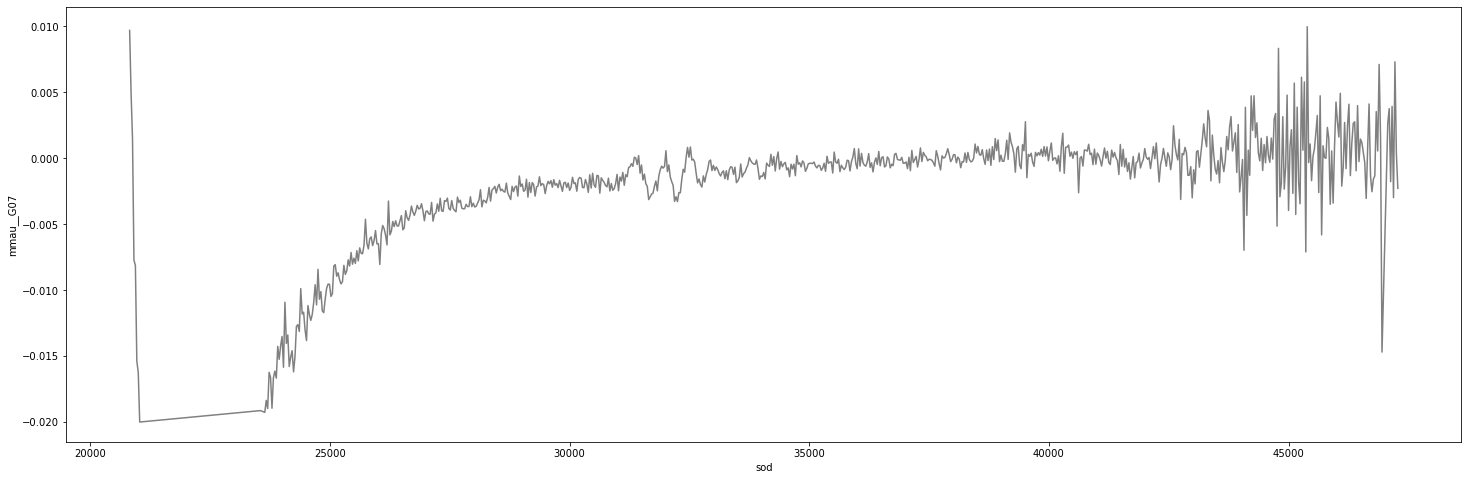

['alep', 'G08']


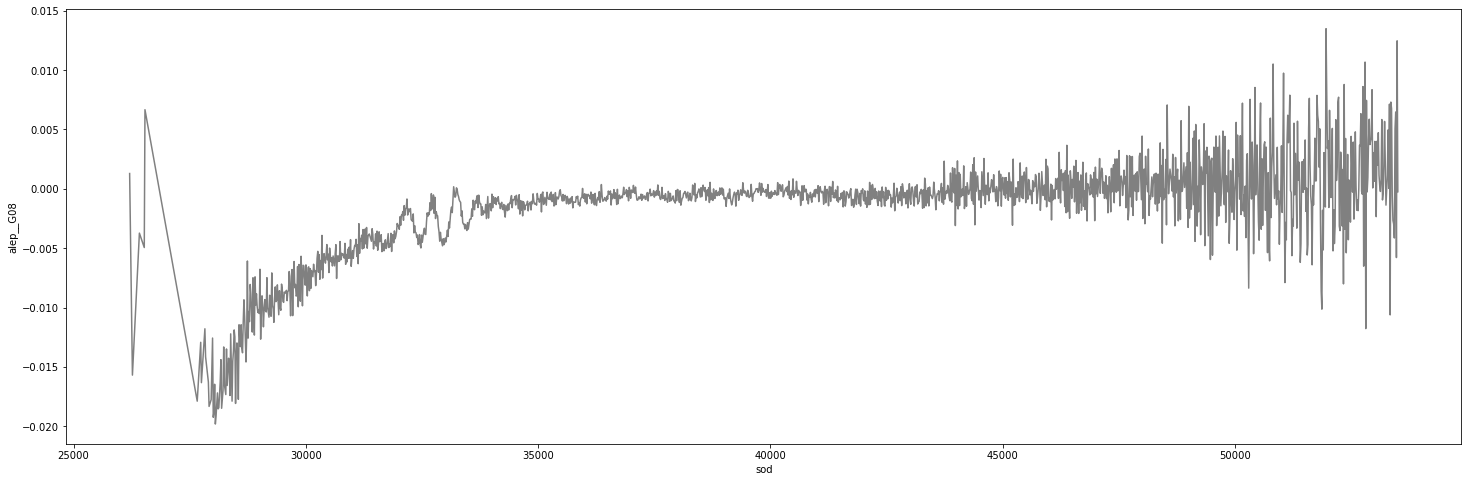

['npit', 'G04']


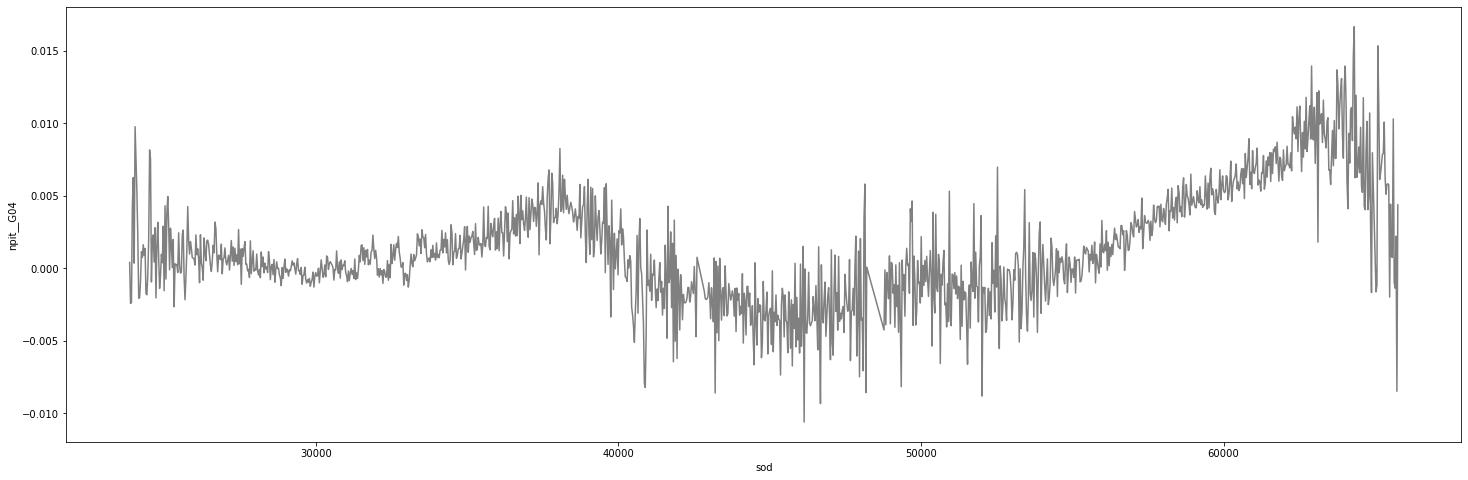

['mlpr', 'G20']


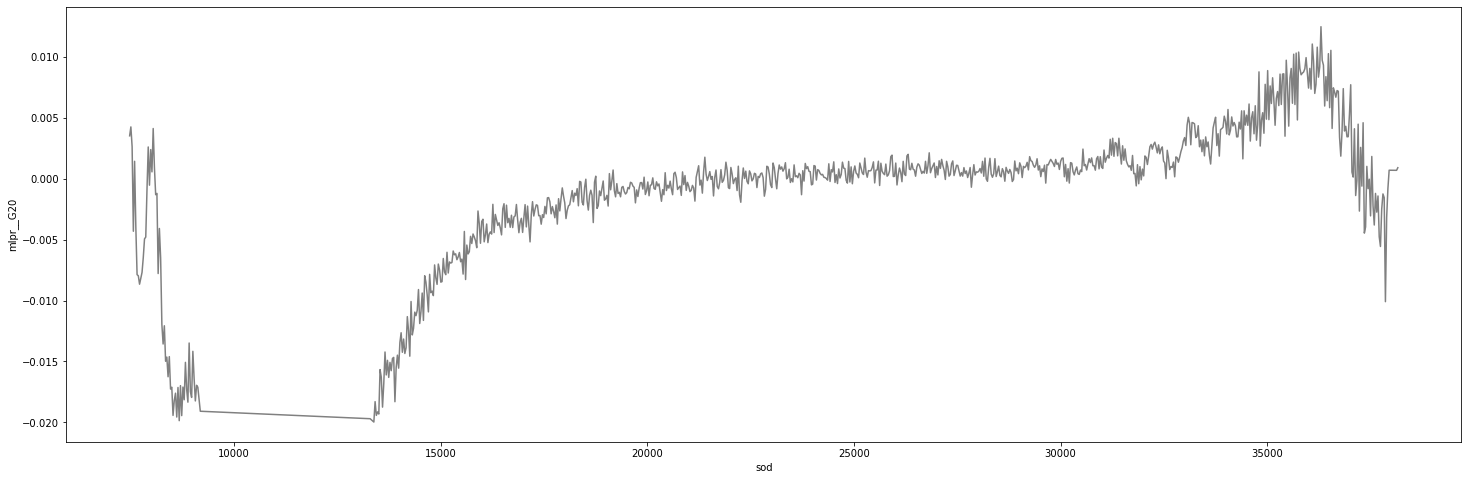

['mmau', 'G20']


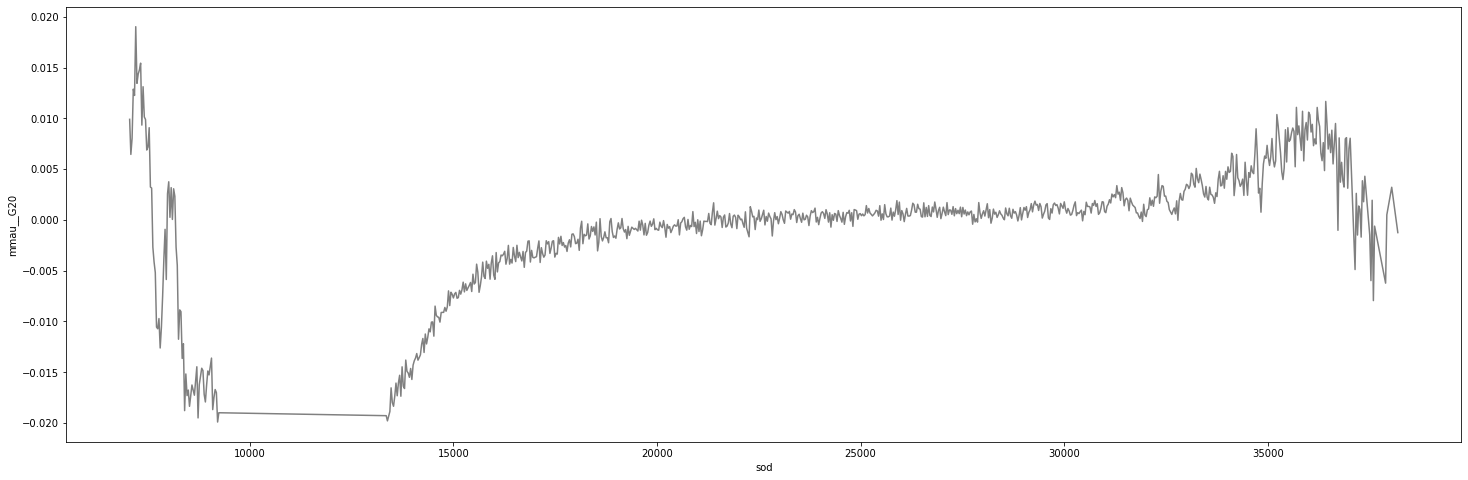

['mkai', 'G08']


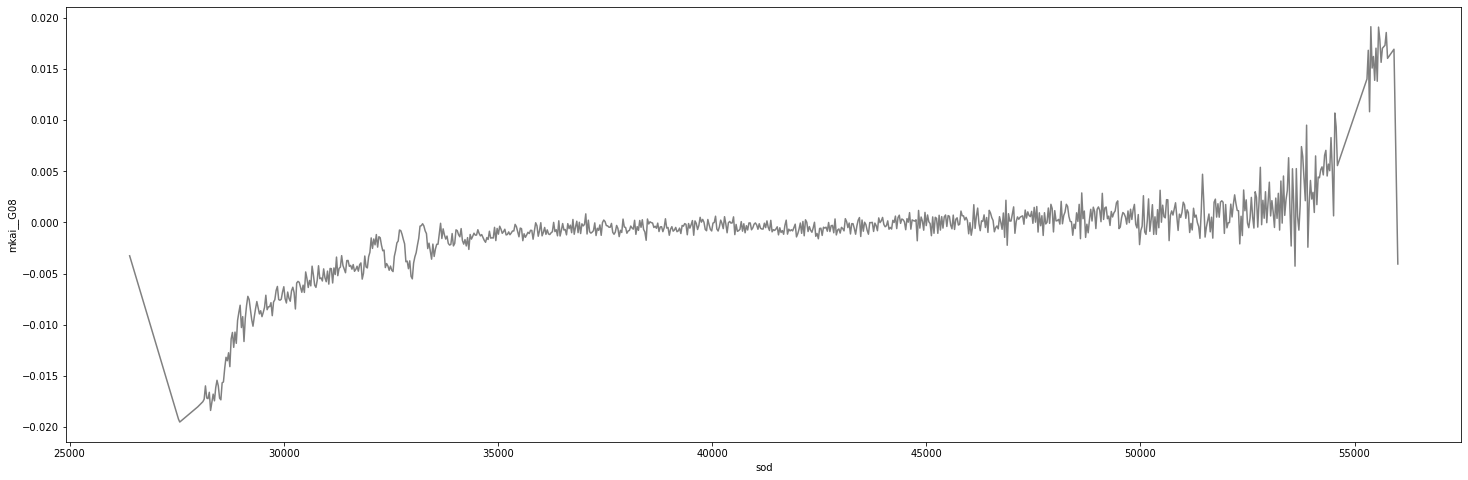

['blbp', 'G07']


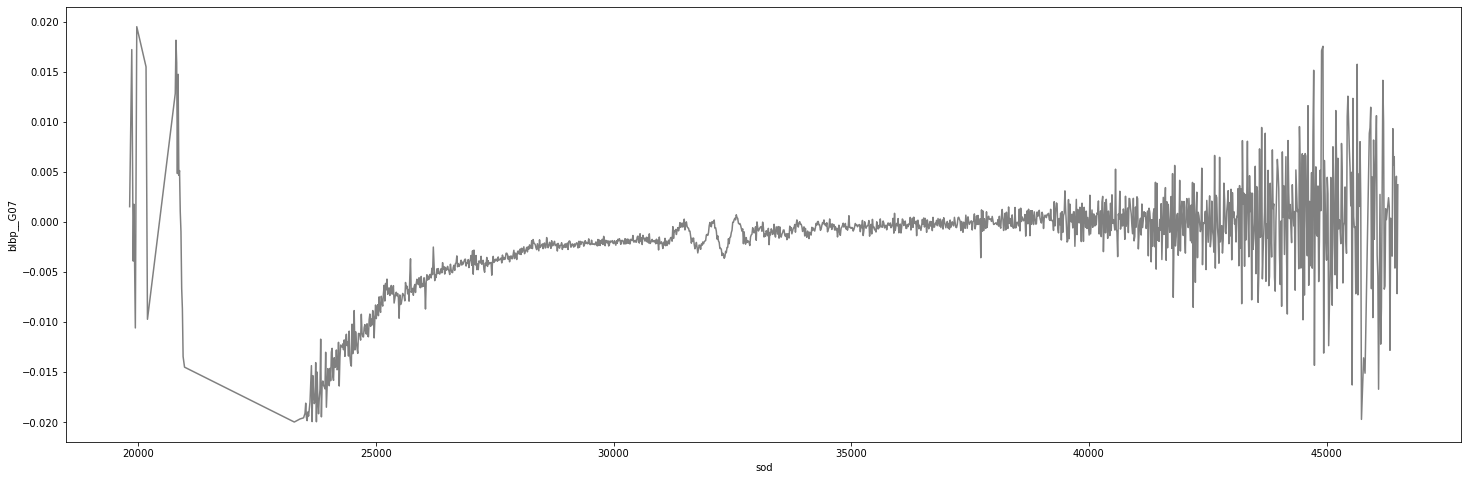

['radf', 'G08']


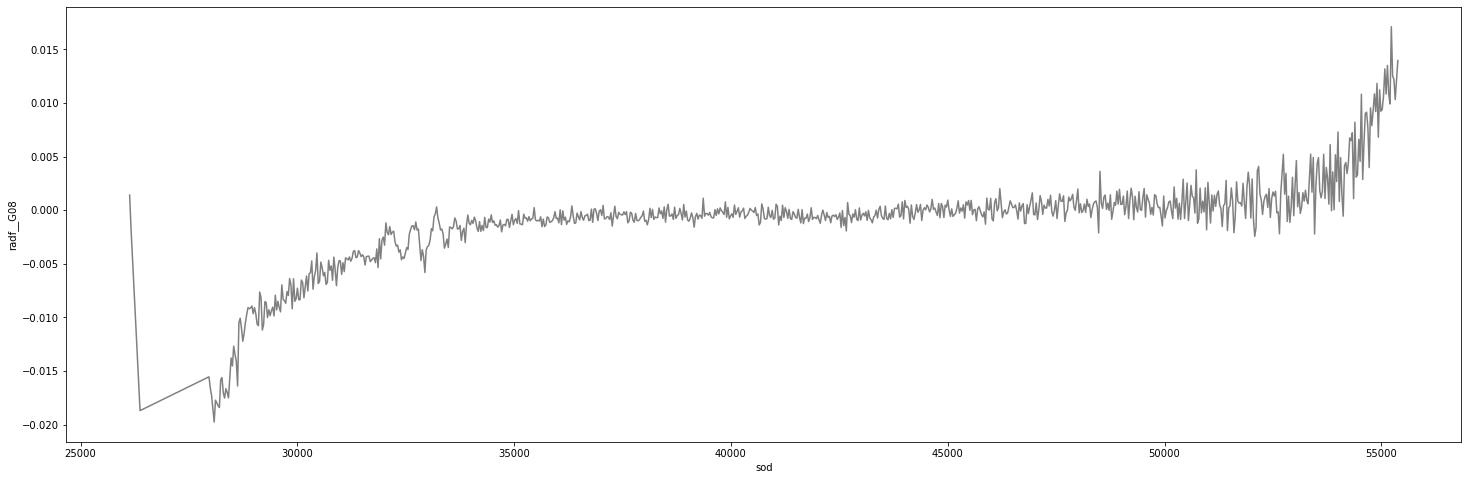

['npoc', 'G04']


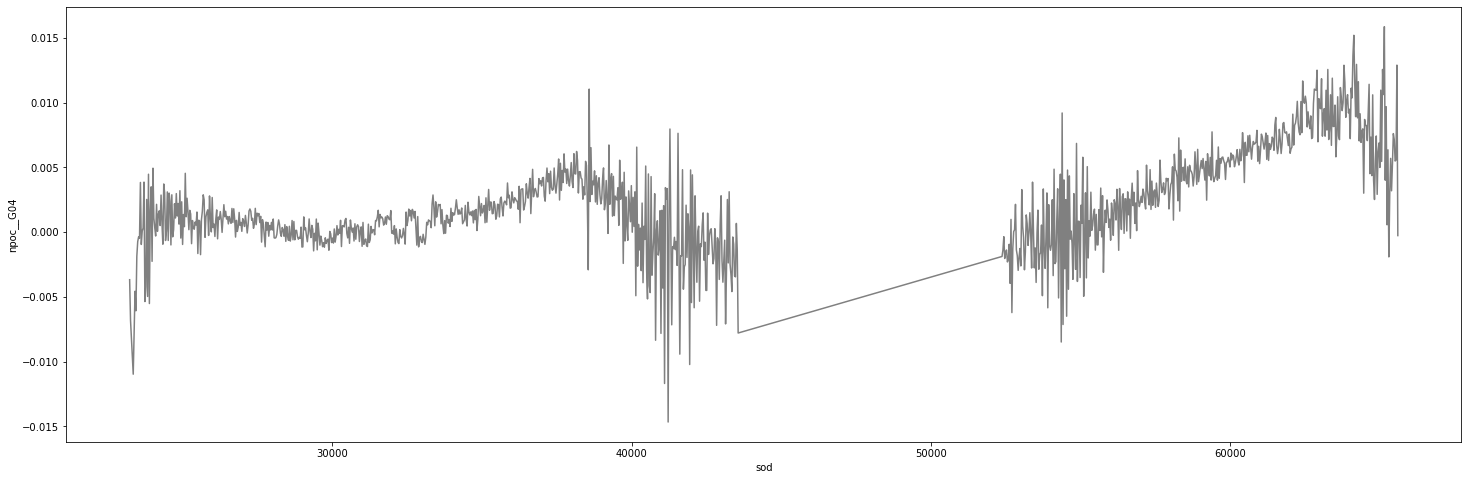

['byrl', 'G07']


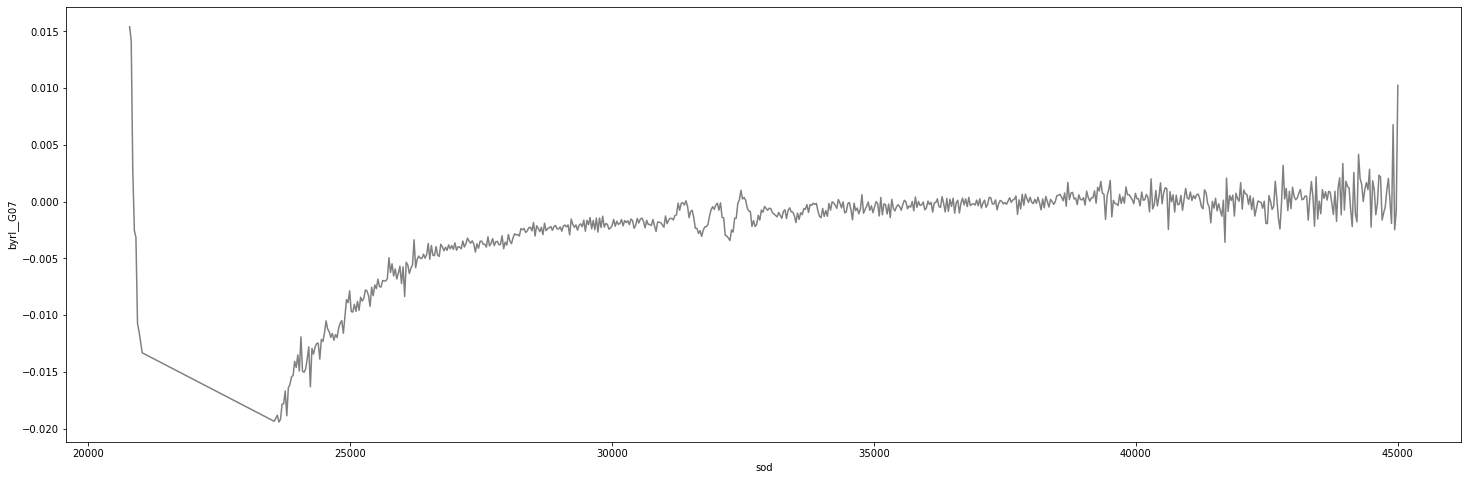

['alep', 'G04']


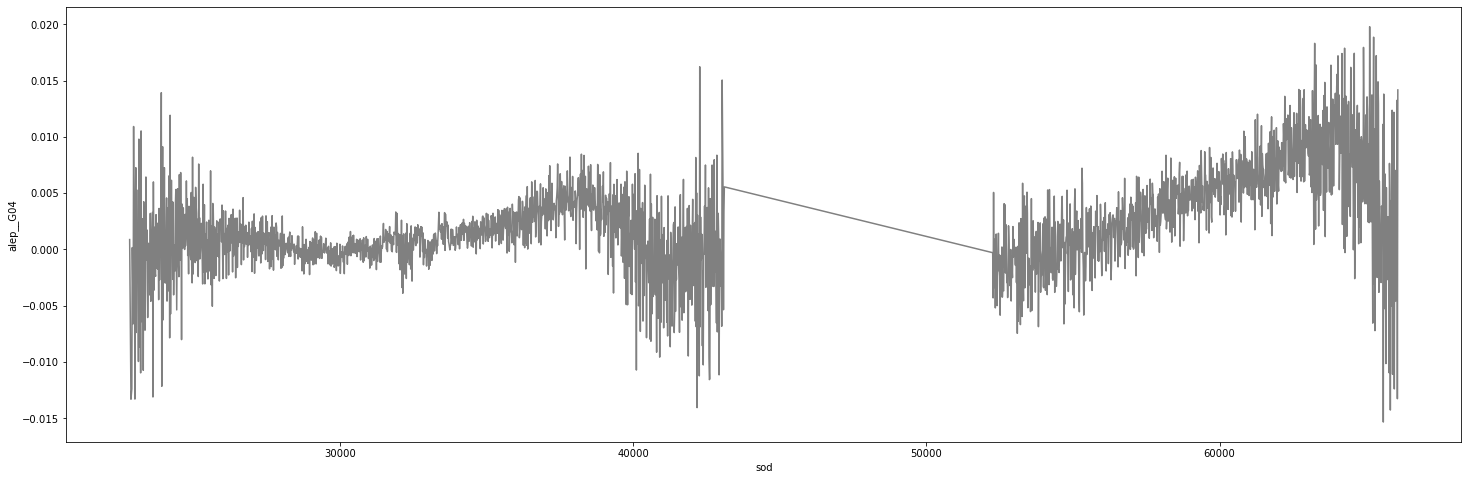

['mokp', 'G04']


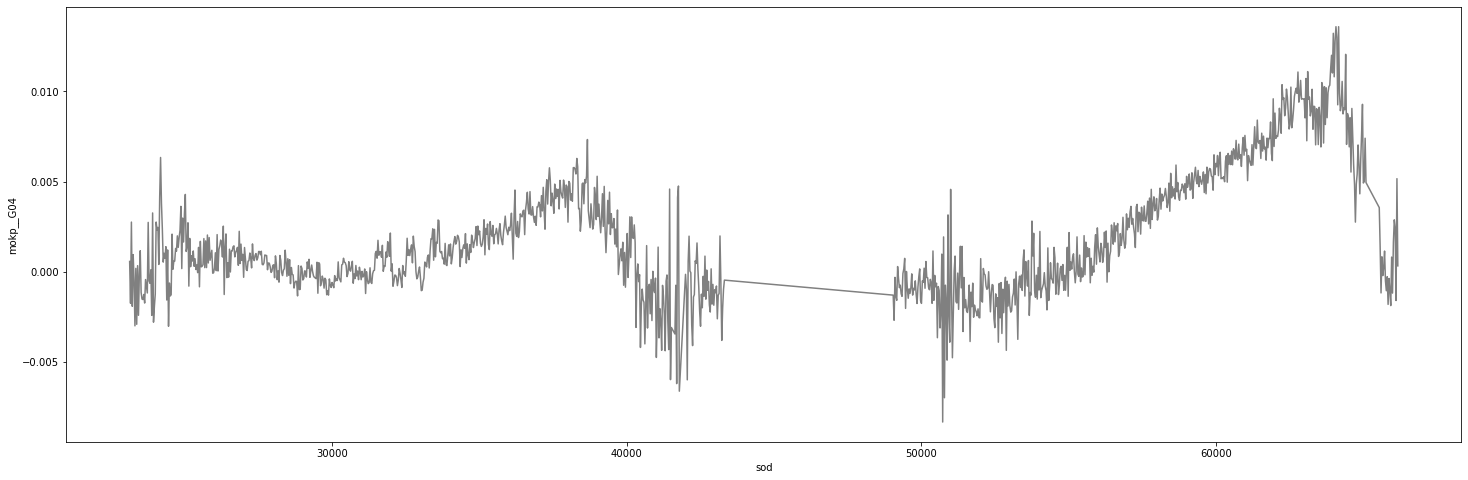

['outl', 'G07']


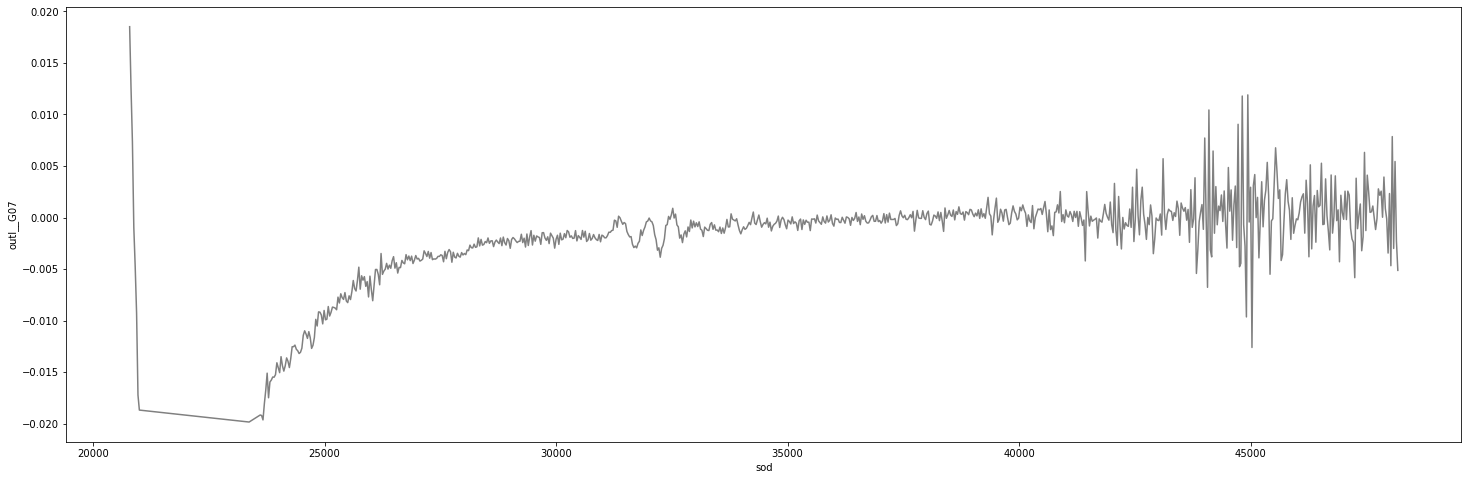

['joka', 'G08']


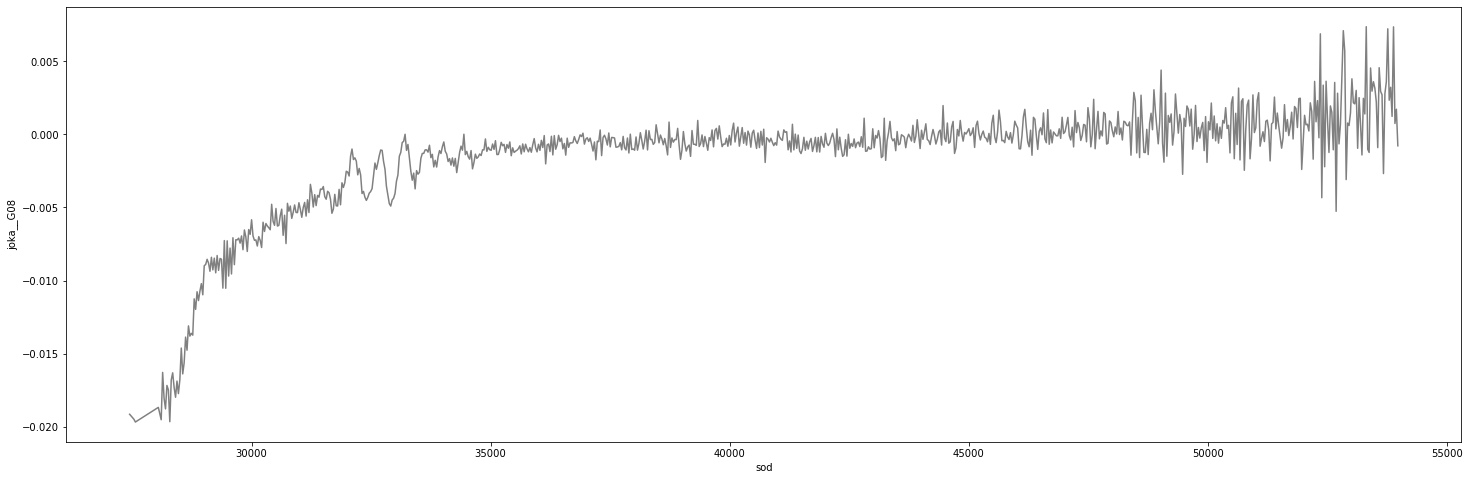

['mlcc', 'G08']


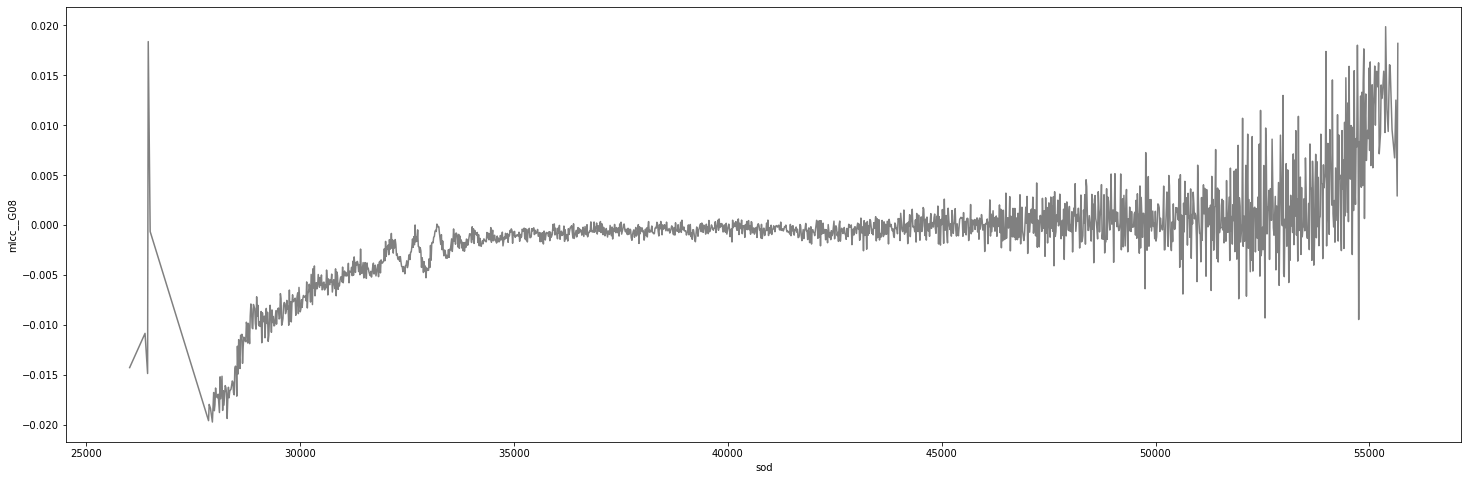

['hole', 'G04']


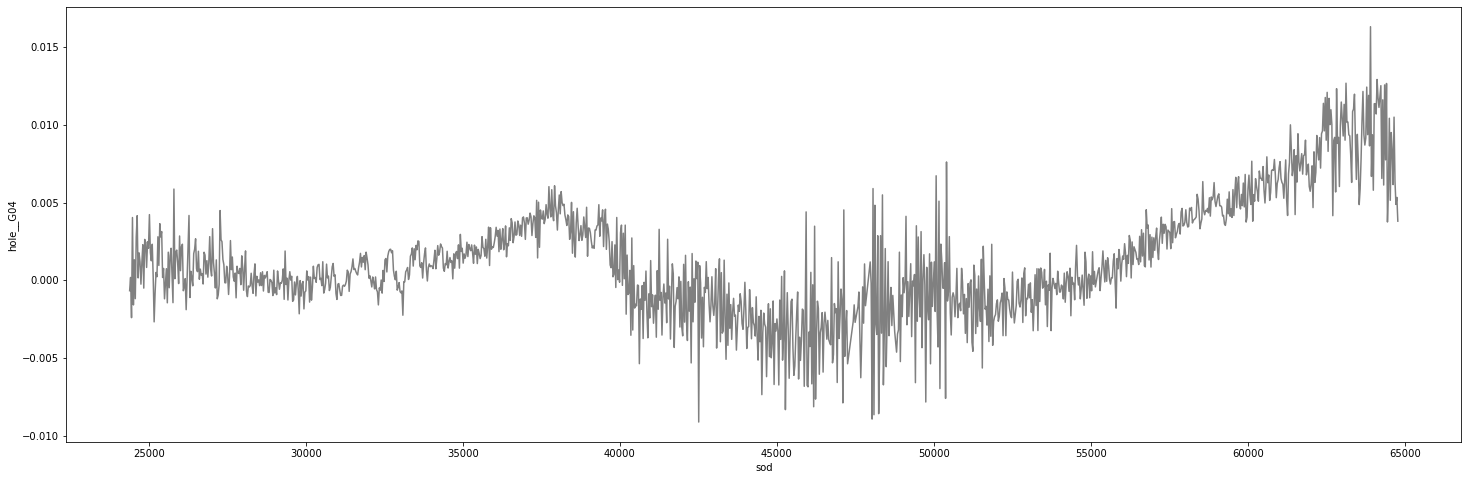

['pgf4', 'G04']


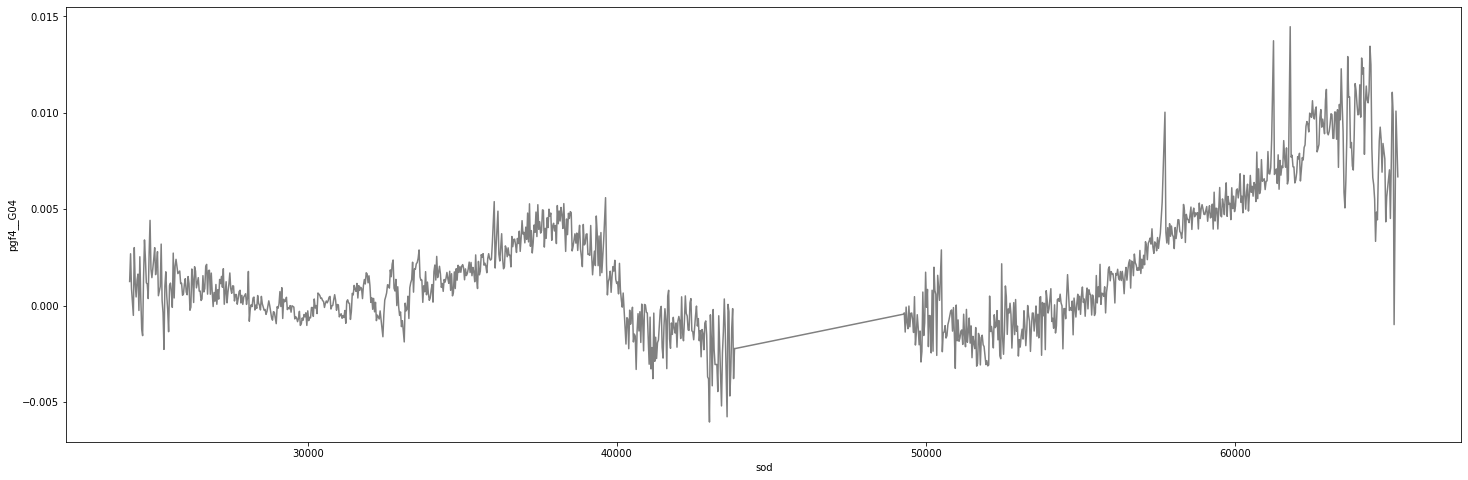

['mlcc', 'G07']


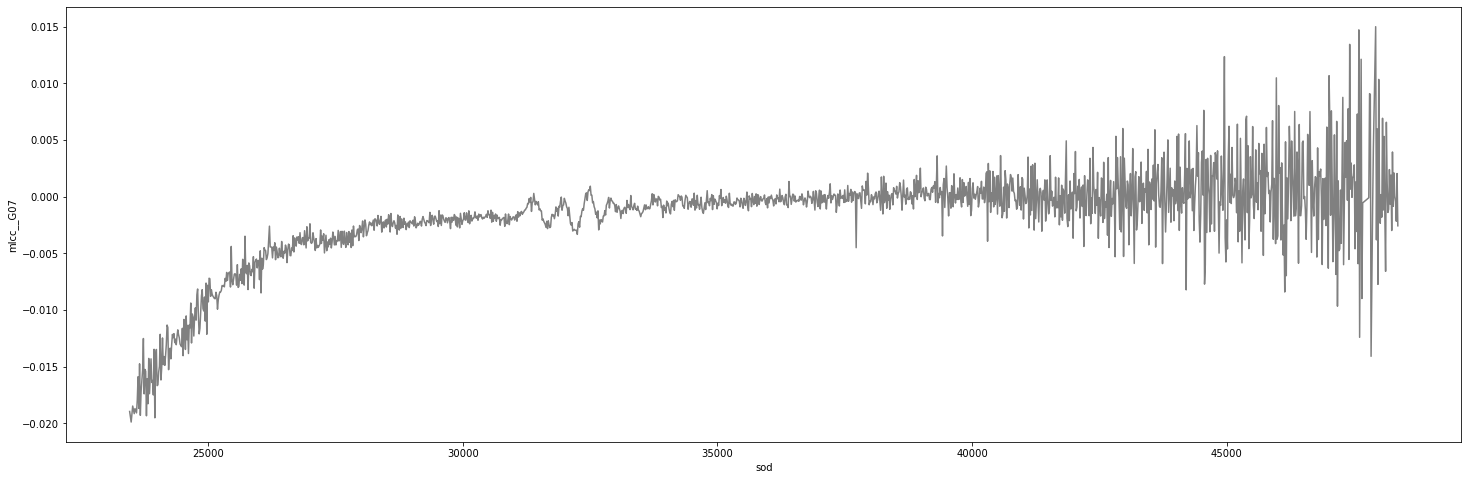

['nupm', 'G08']


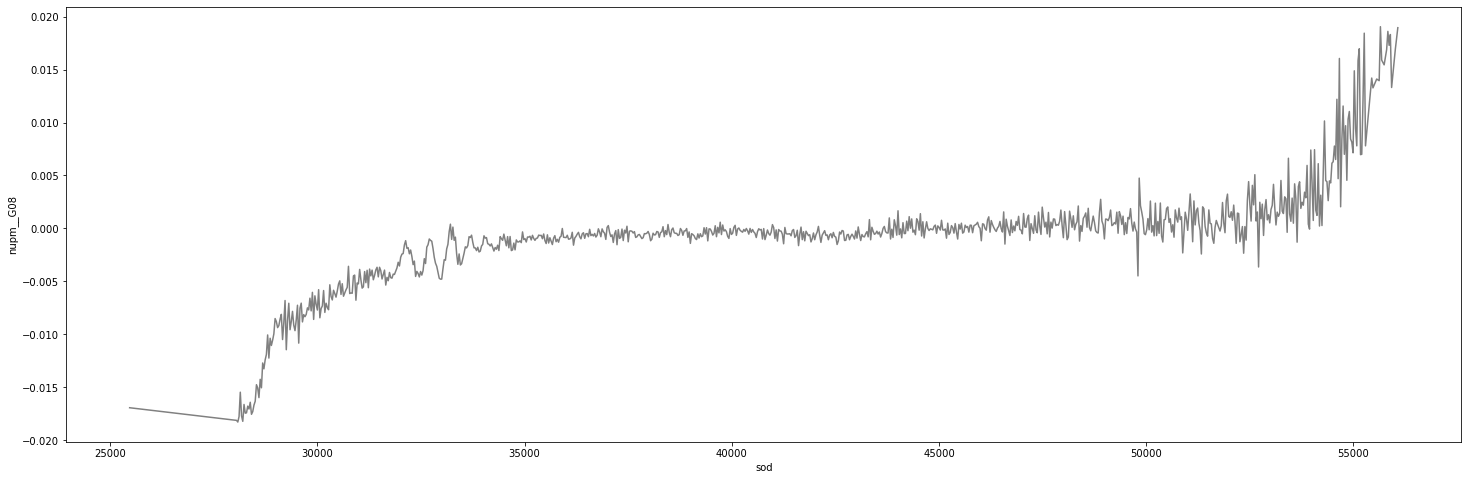

['mlsp', 'G04']


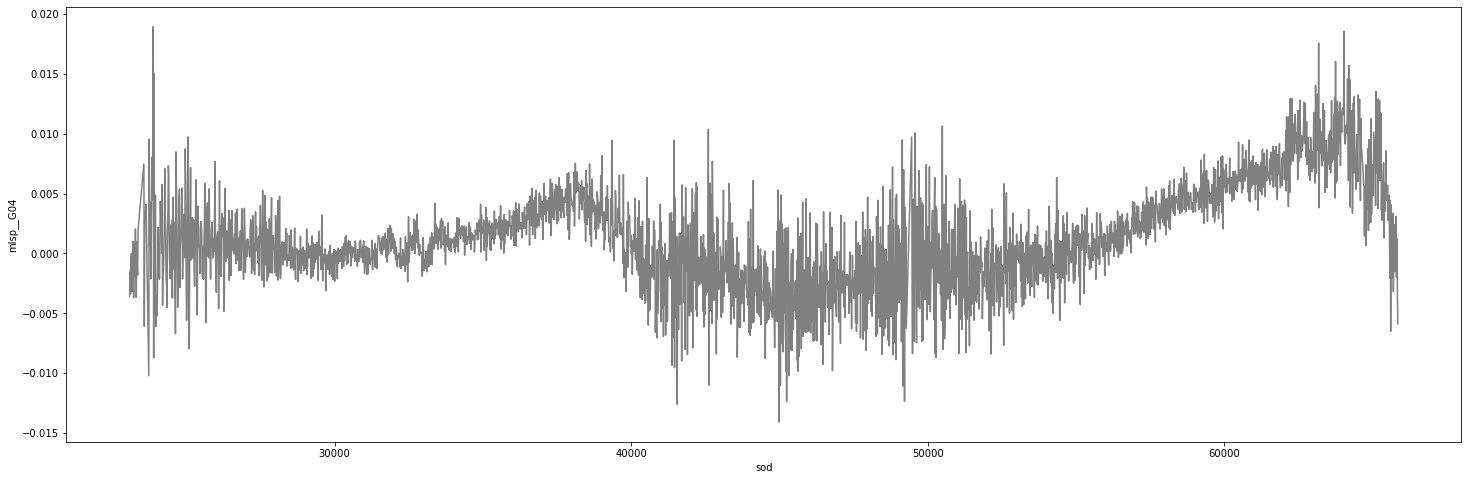

['mles', 'G04']


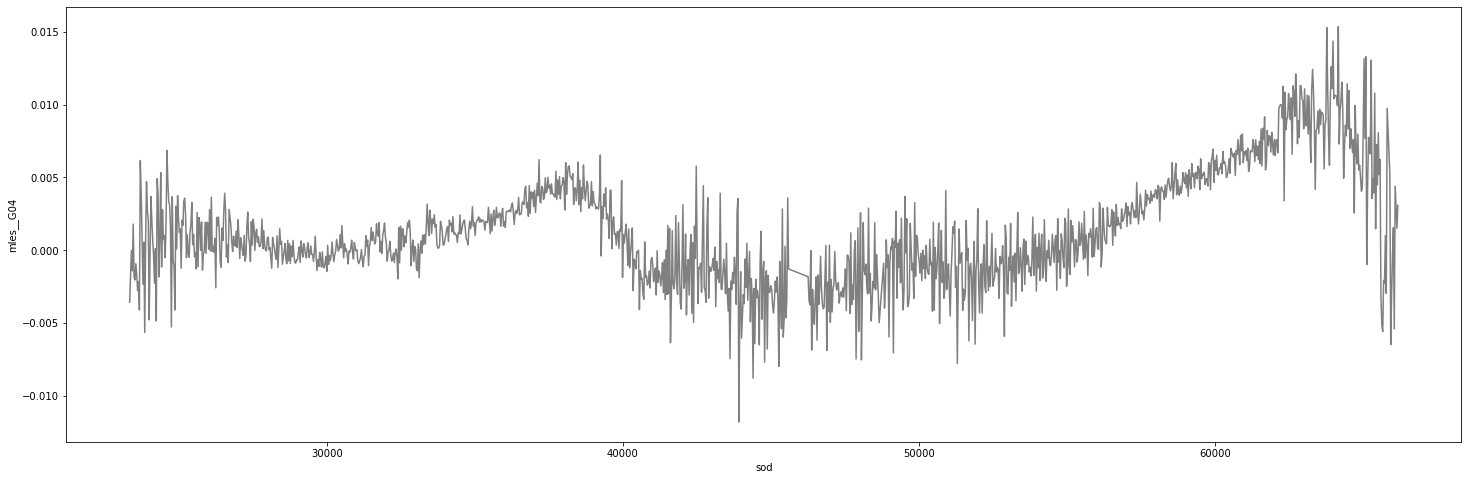

['kaep', 'G08']


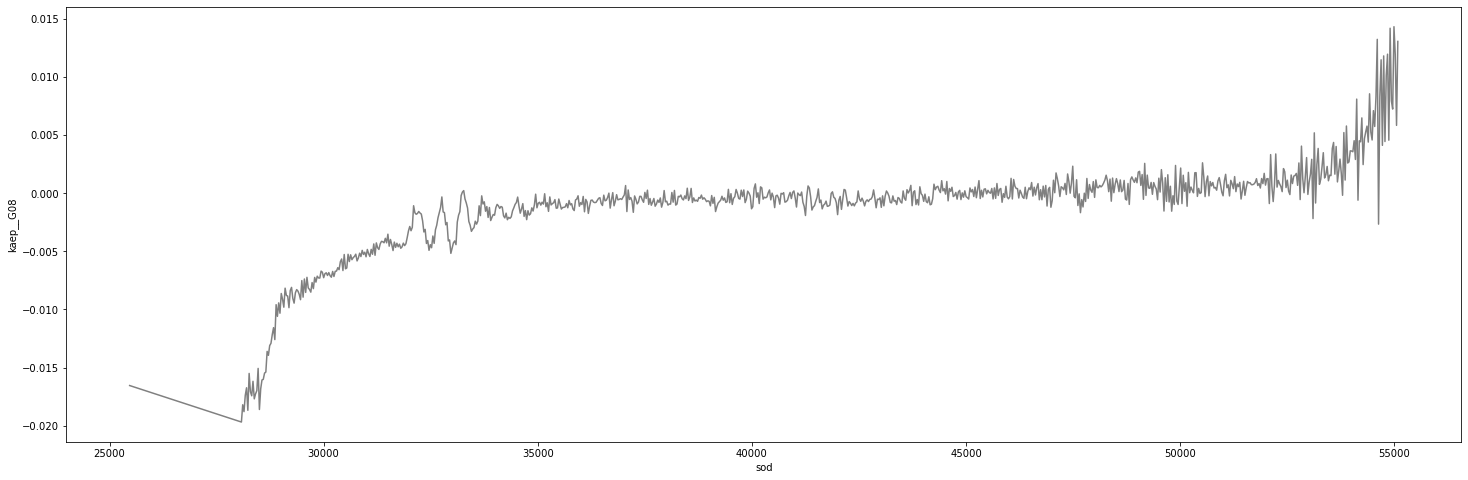

['mles', 'G10']


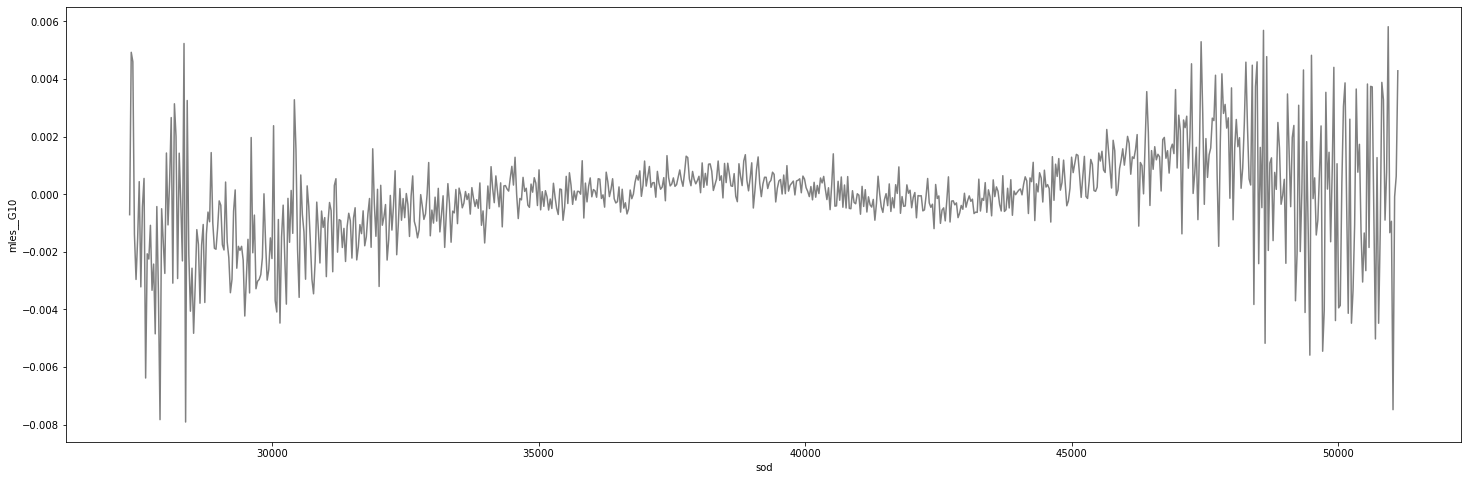

['mane', 'G08']


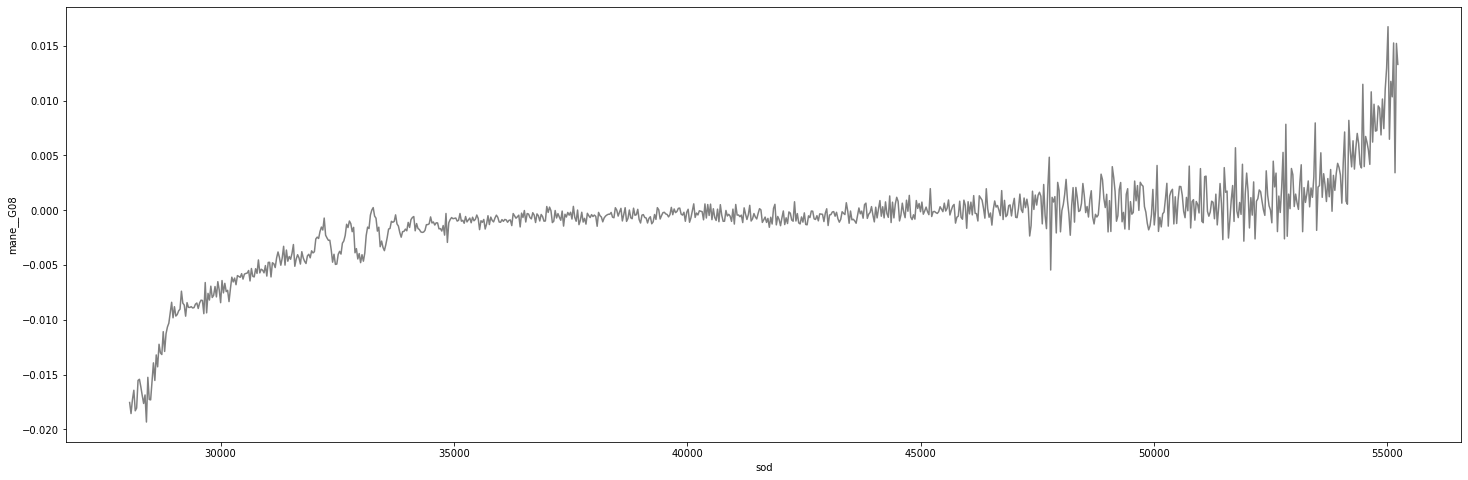

['alal', 'G10']


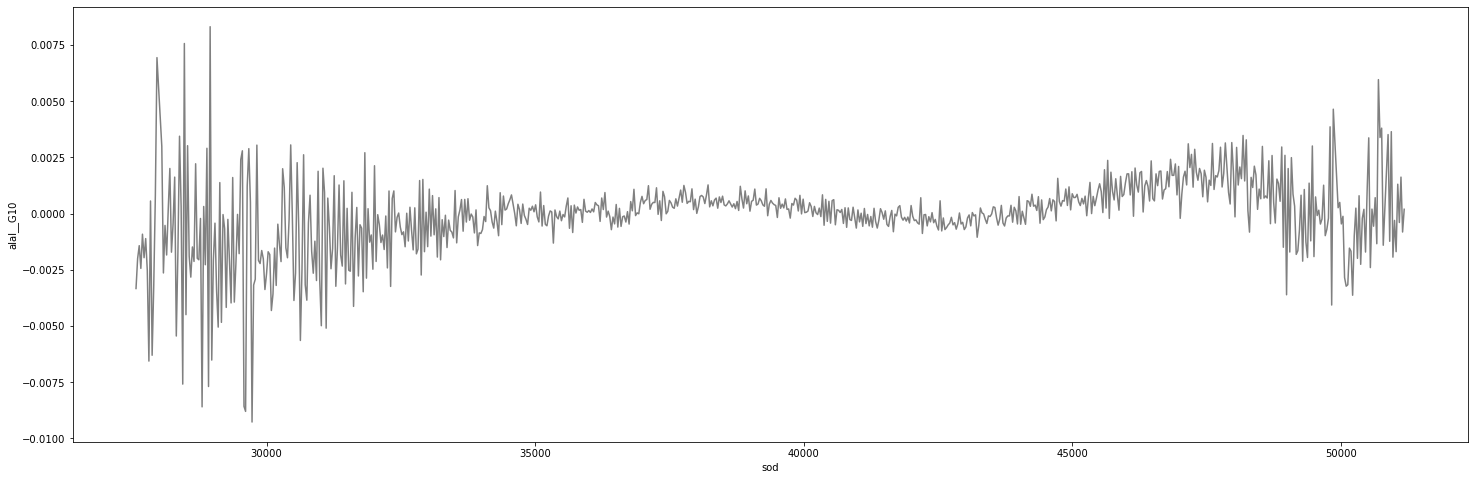

['phan', 'G07']


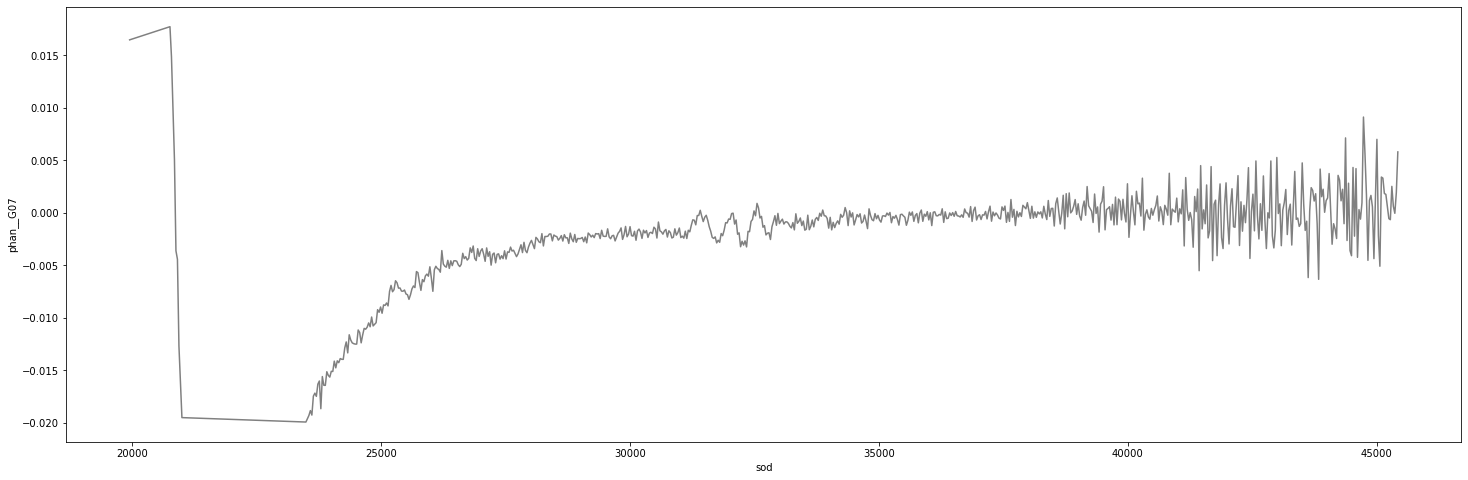

['pgf4', 'G20']


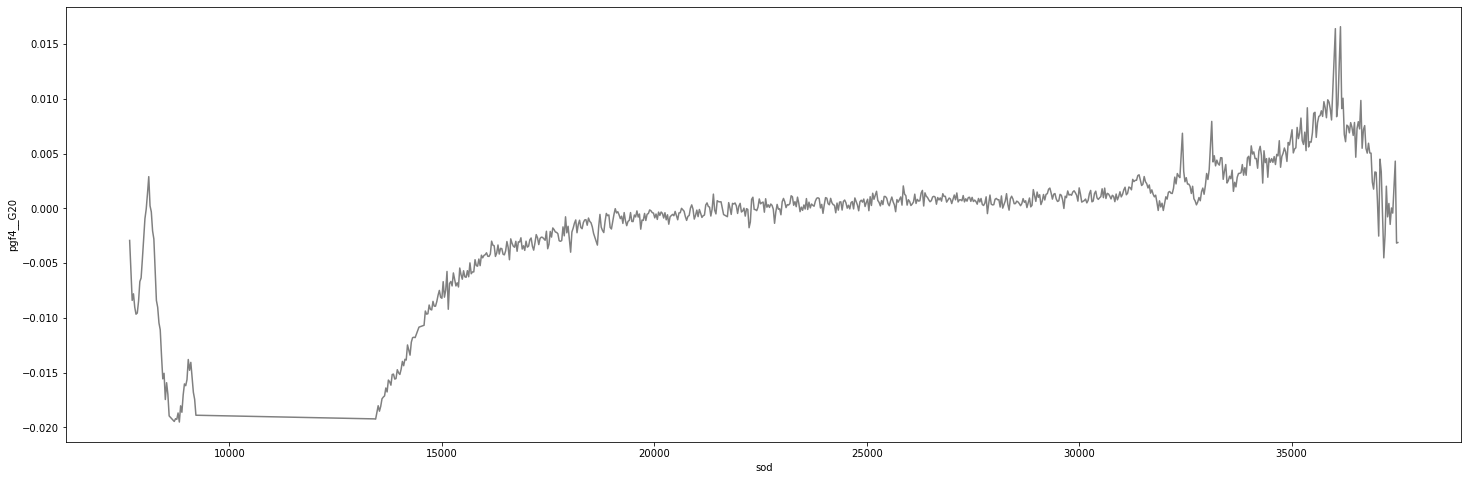

['uwev', 'G08']


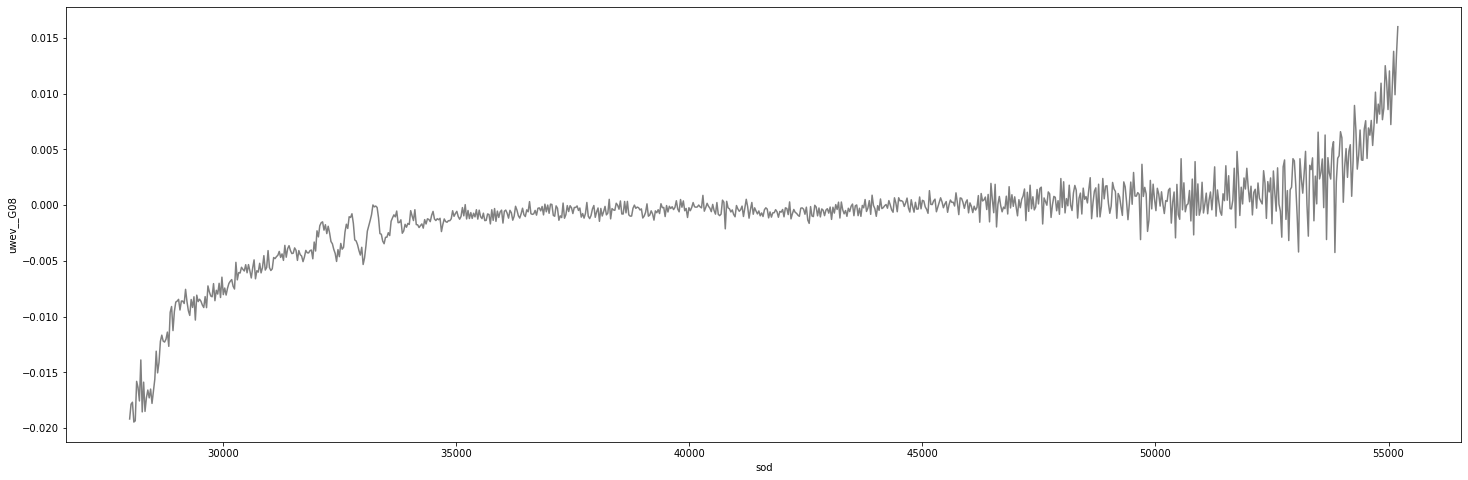

In [ ]:
# for each track, load the data on the day of the earthquake and plot as a line plot 

data_pth = pathlib.Path("../data/hawaii/2012/302/")

for t in tracks: 
        
    try:

        # read in the .txt file 
        split_t = t.split("__")
        
        if len(split_t) >= 2:

            print(split_t)

            file_name = split_t[0] + "3020.12o_" + split_t[1] + ".txt" # 302 day of earthquake (day of year, doy)

            f = open(data_pth / file_name, 'r')
            line1 = f.readline()
            line1 = line1.replace('#', '').replace("dsTEC/dt [TECU/s]", "dsTEC/dt").replace("elev", "ele")
            rename_cols = line1.split()
            rename_cols.remove("sod")
            new_cols = list()

            # rename the columns
            for rn_col in rename_cols:
                new_col = t + "_" + rn_col
                if rn_col == "dsTEC/dt":
                    new_col = t
                new_cols.append(new_col)
            new_cols = ["sod"] + new_cols

            df = pd.read_table(
                data_pth / file_name,
                index_col='sod',
                sep="\t\t| ",
                names=new_cols,
                engine="python",
                skiprows=1
            )

            new_cols.remove('sod')

            df_new = df[new_cols]
            
            # plot the data 
            # plot the things! 
            plt.figure(figsize=(25, 8))

            ax = sns.lineplot(x=df_new.index, y=t, data=df_new, color="gray")
#             ax.lines[0].set_linestyle("--")

#             ax2 = sns.scatterplot(x=dataframe.index, y=dependent + "_target",
#                         data=dataframe,
#                         color="gray")


#             ax3 = sns.lineplot(x=dataframe.index, y="predicted", data=dataframe, color="blue")

            plt.show()
            
            
            


    except FileNotFoundError:
        print("File not found for: " + t)
    
    



In [2]:
# # plot the things! 
#     plt.figure(figsize=(30, 10))

#     ax = sns.lineplot(x=dataframe.index, y=dependent + "_target", data=dataframe, color="gray")
#     ax.lines[0].set_linestyle("--")

#     ax2 = sns.scatterplot(x=dataframe.index, y=dependent + "_target",
#                 data=dataframe,
#                 color="gray")


#     ax3 = sns.lineplot(x=dataframe.index, y="predicted", data=dataframe, color="blue")

#     plt.show()